-------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------ ACCELEROMETER ----------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------
List of file names in the folder:
1691852455
1691852154
mean dt : 0.0012068471811556255  s
mean sampling rate : 970.6643003105181 Hz
total samples 141460
mean dt : 0.0012798260825234564  s
mean sampling rate : 961.6762719792871 Hz
total samples 234679


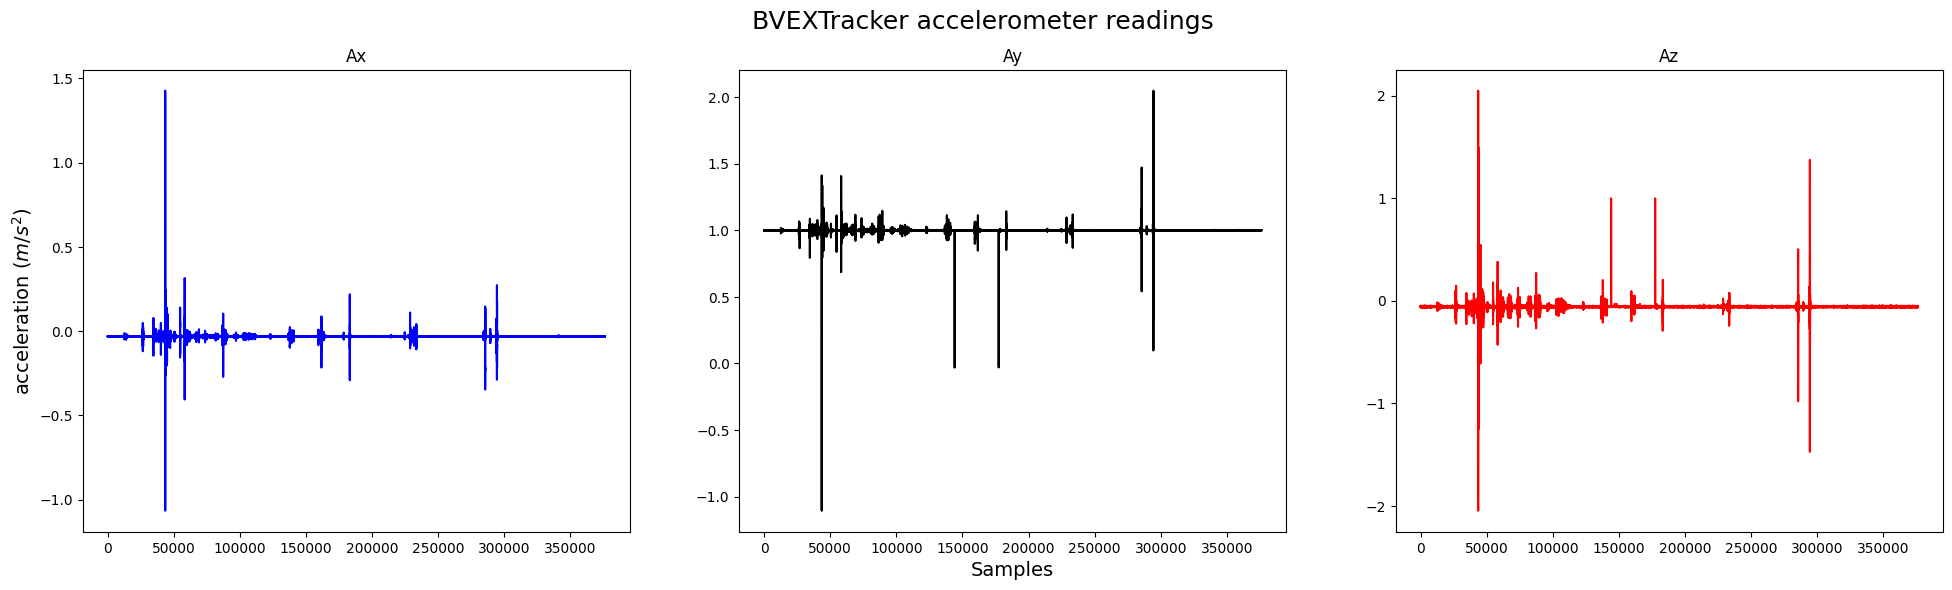

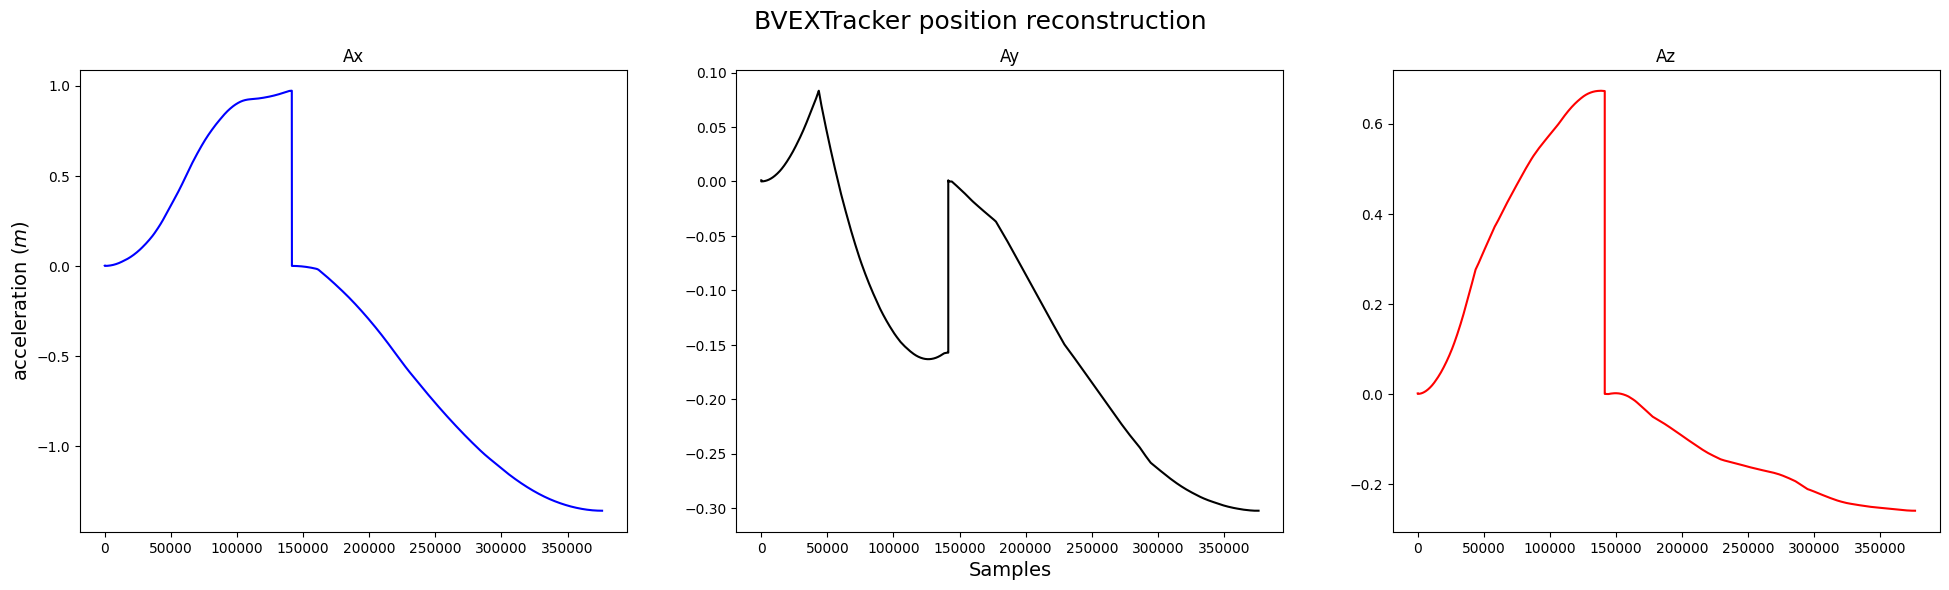

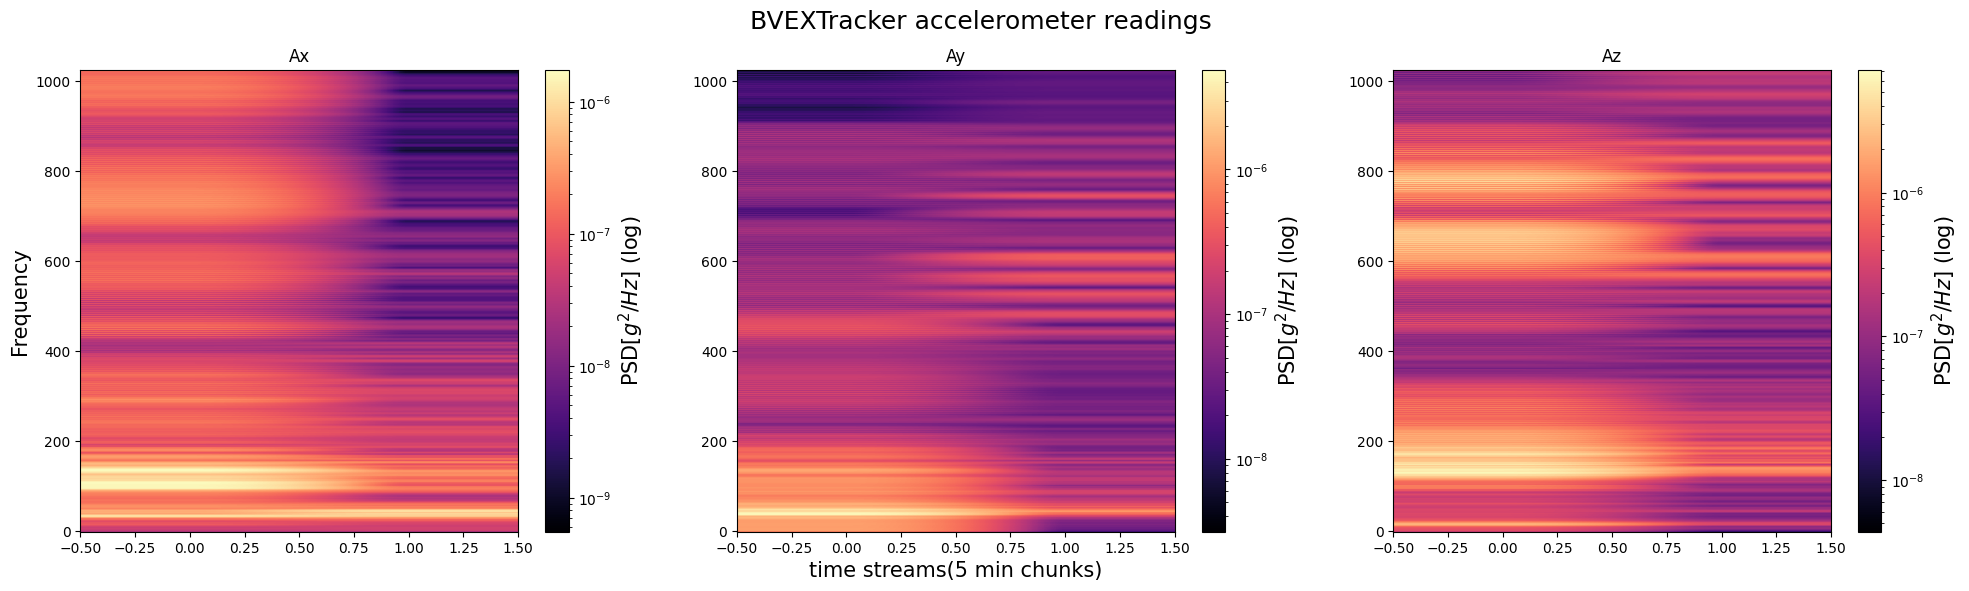

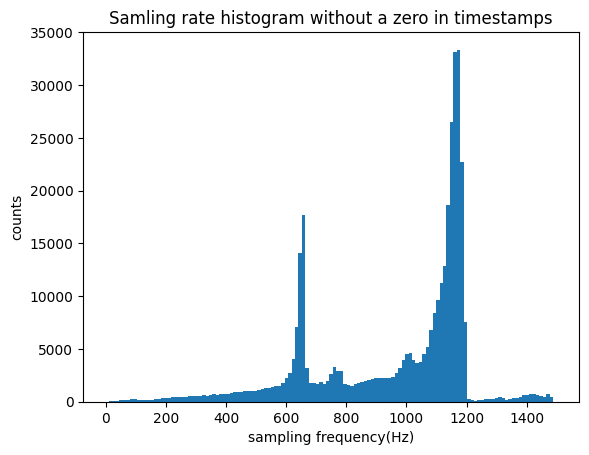

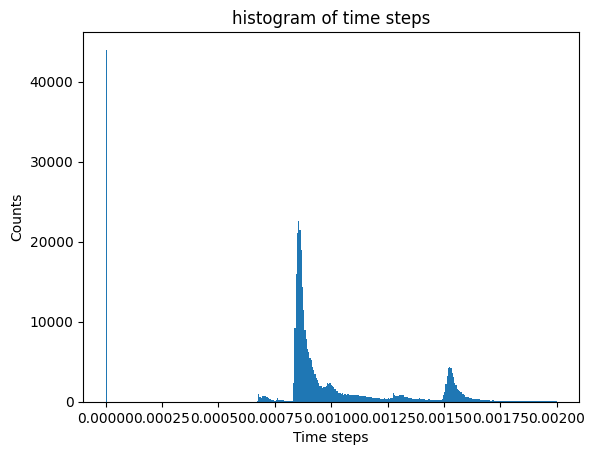

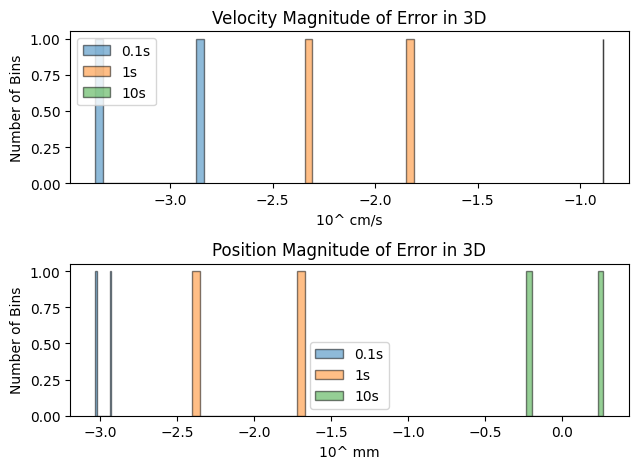

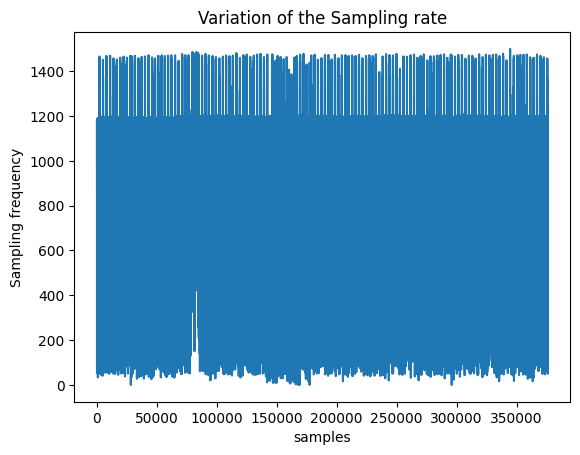

82.16319531668105 % of data does not have zero as its time
RMS ax: 0.032105420975727356
RMS ay: 0.9994036934455047
RMS az: 0.059824450413607955
1.0055153369903564
1.0032687187194824
1.0033957958221436
-------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------ GYROSCOPE ----------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------
List of file names in the folder:
1691852455
1691852154
mean dt : 0.005450294939858032  s
mean sampling rate : 197.82953299560106 Hz
total samples 31244
mean dt : 0.005326611342158279  s
mean sampling rate : 197.53524838218357 Hz
total samples 56379


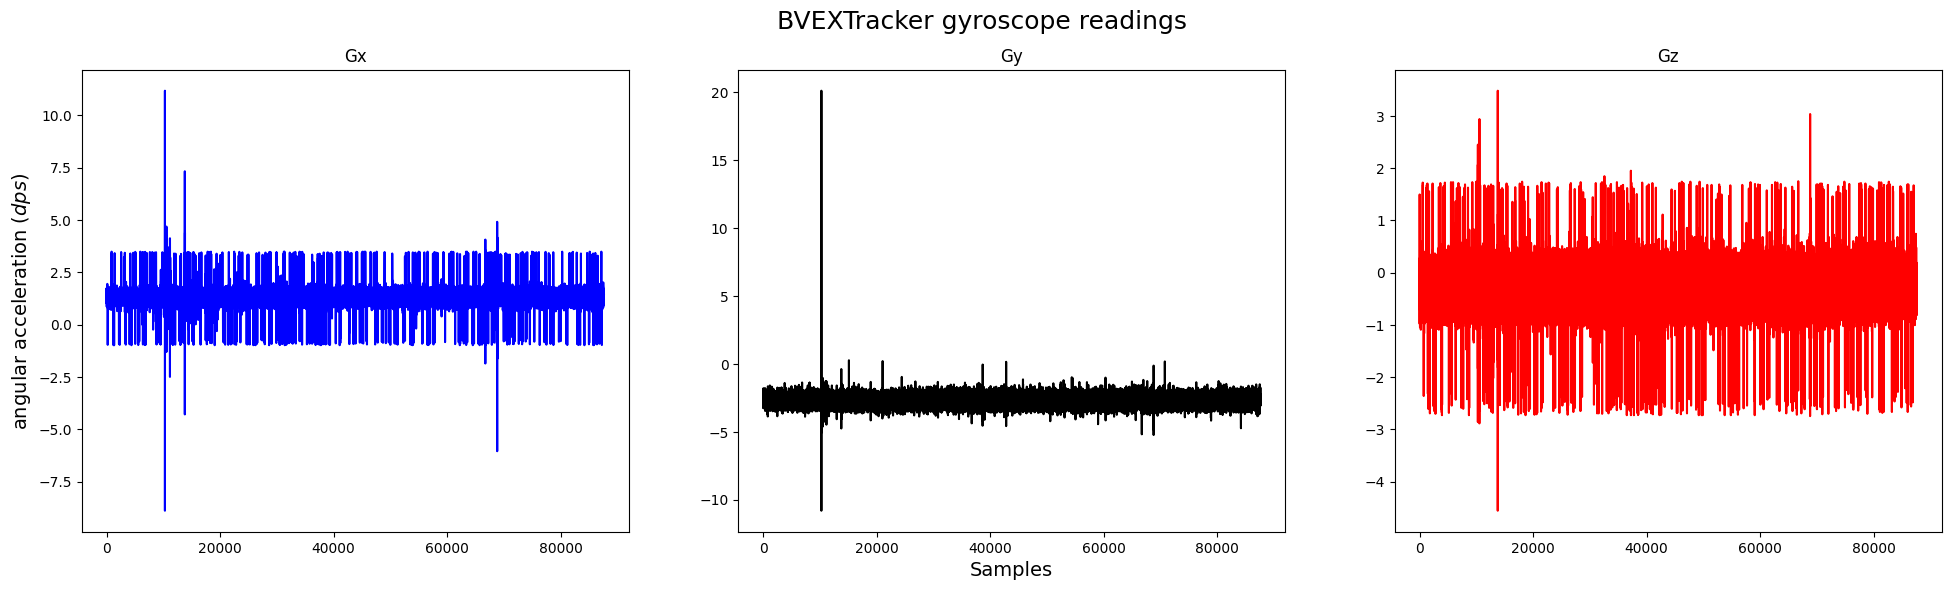

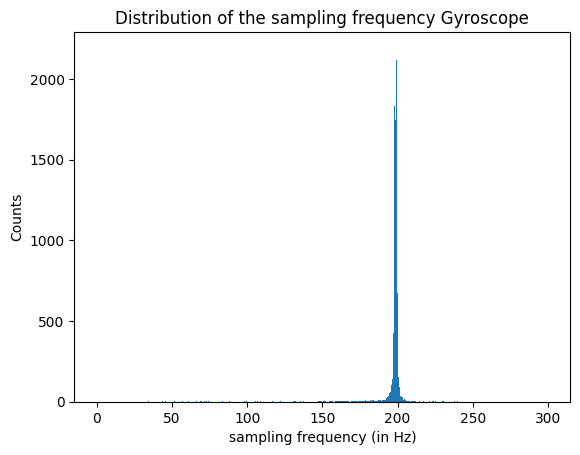

-------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------ IMU --------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------
1691852155
1691852456


/var/folders/8g/zw9cjxxx2hz2444l1w_17w640000gn/T/ipykernel_2881/655086247.py:913: RuntimeWarning: invalid value encountered in divide
  outlier_indices = np.where(np.abs((sensor_data - mean) / std_dev) > z_threshold)[0]


The mean dt for the whole data 0.022700835378110462
The mean sampling rate for the whole data 51.45159208228267


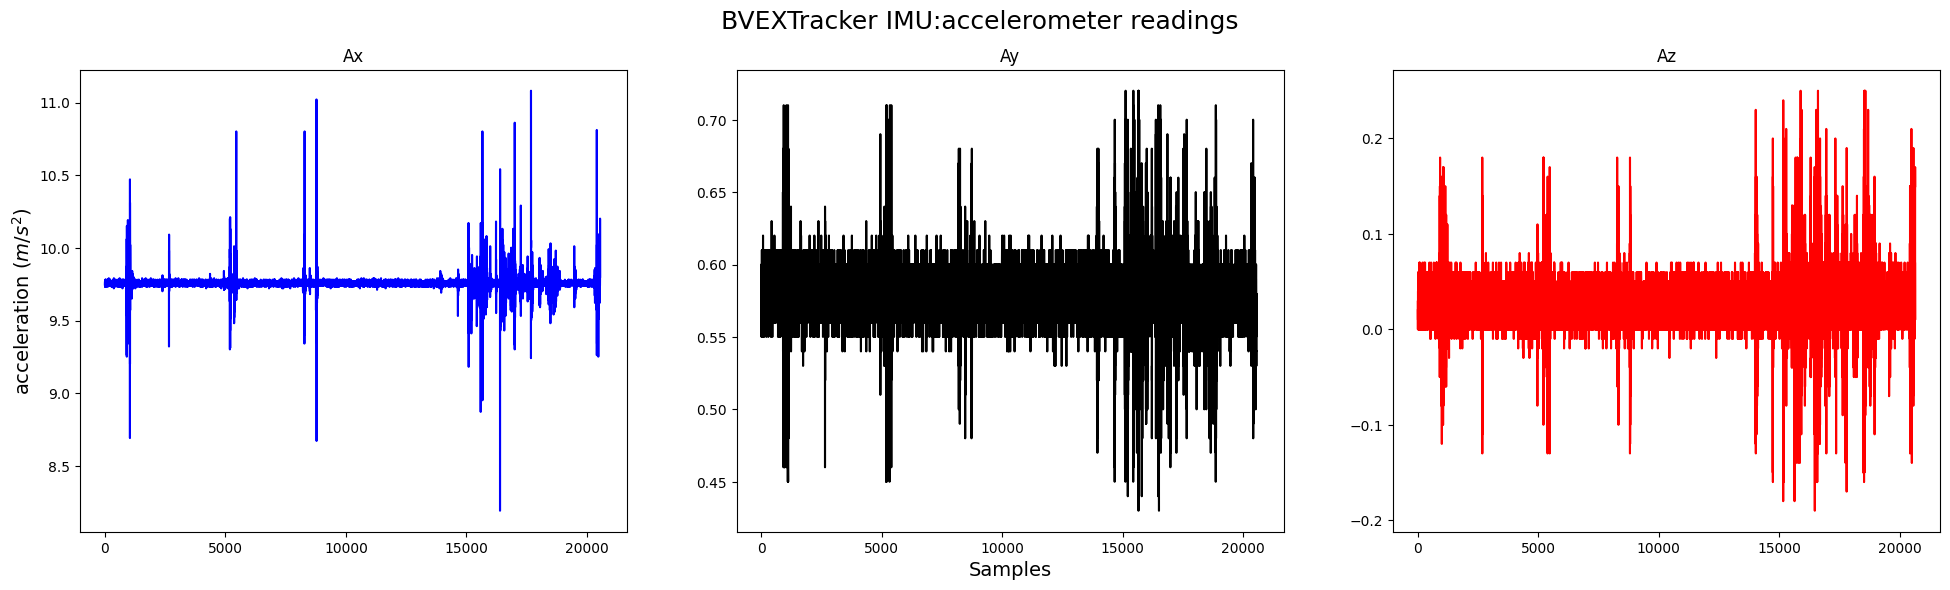

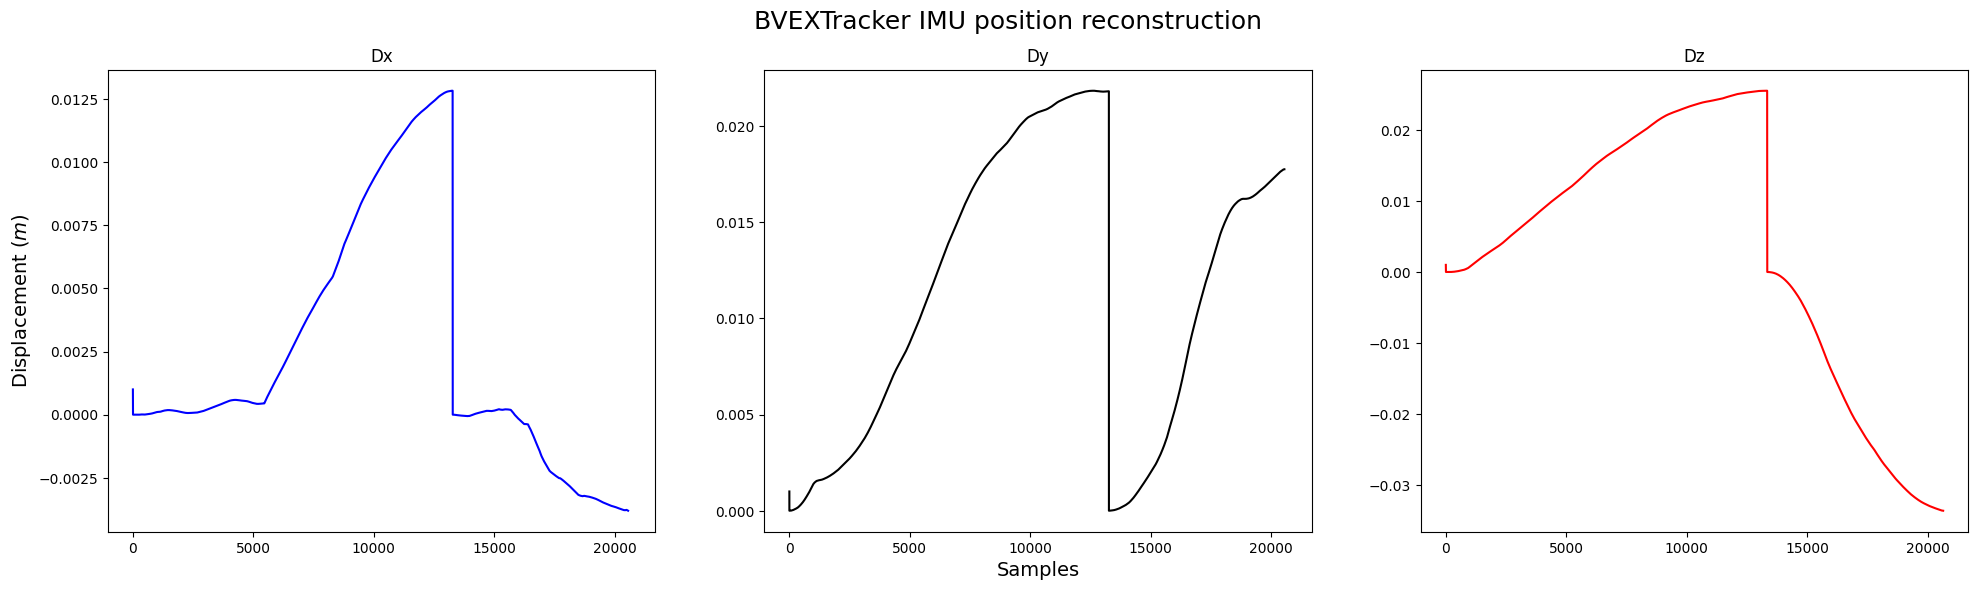

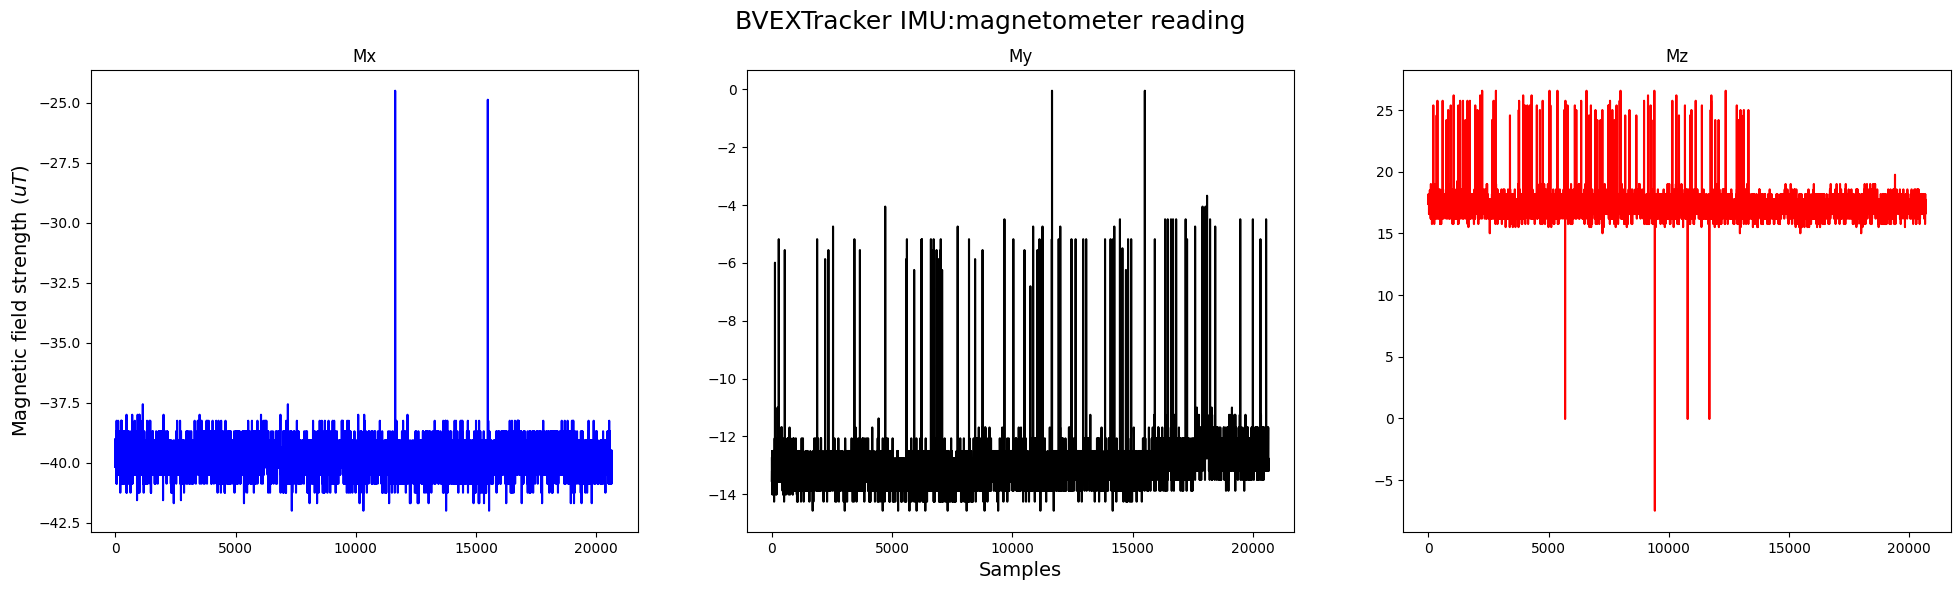

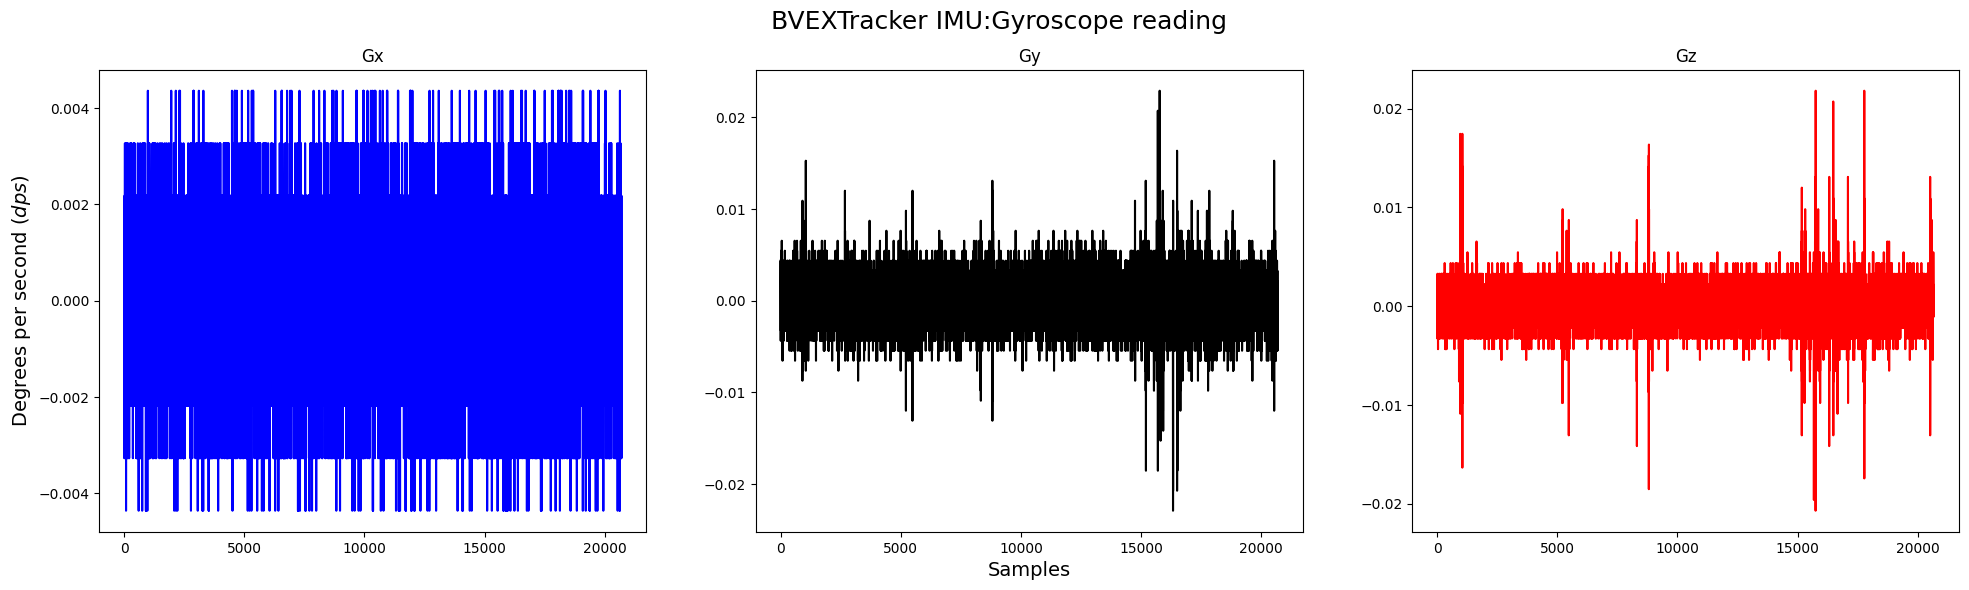

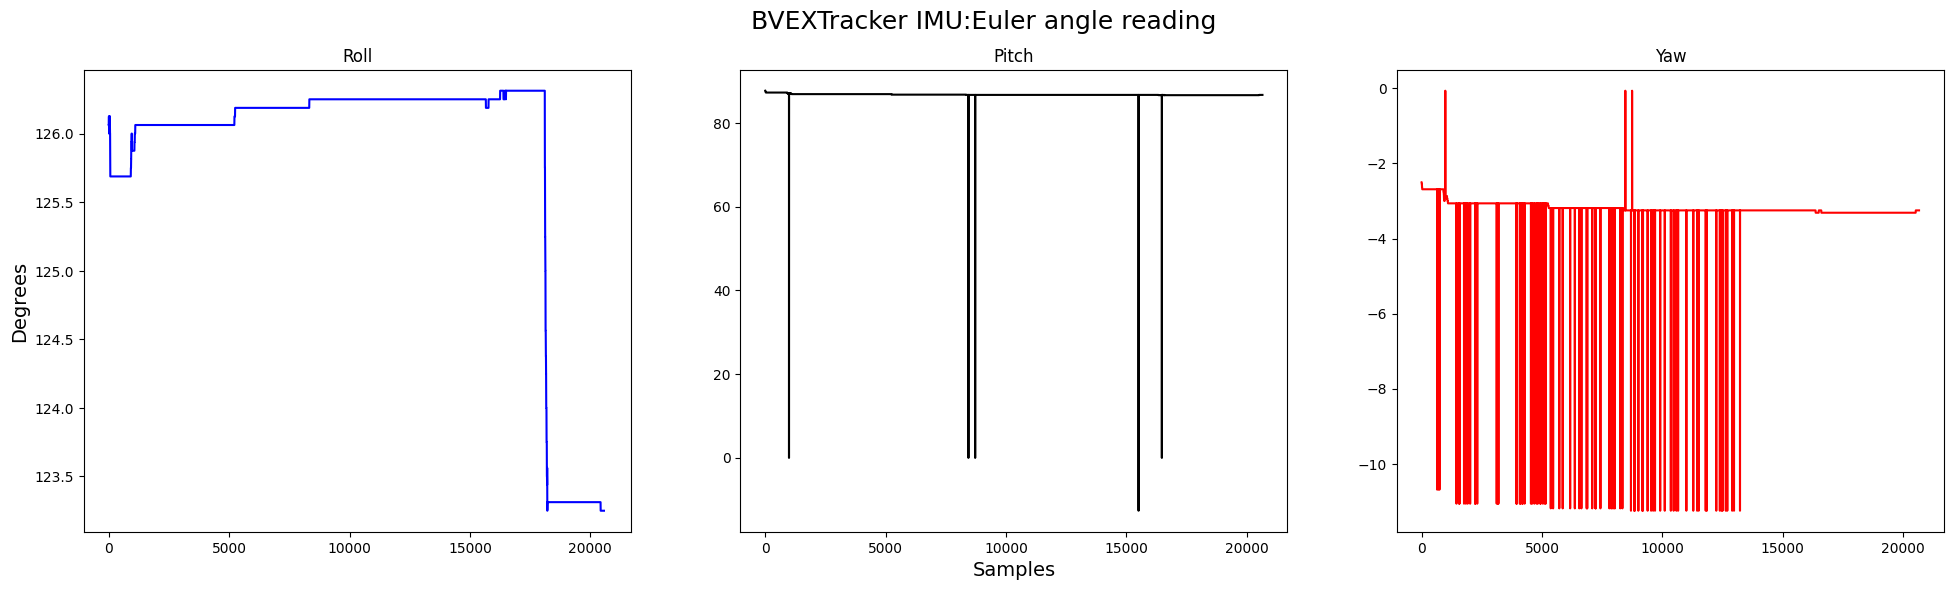

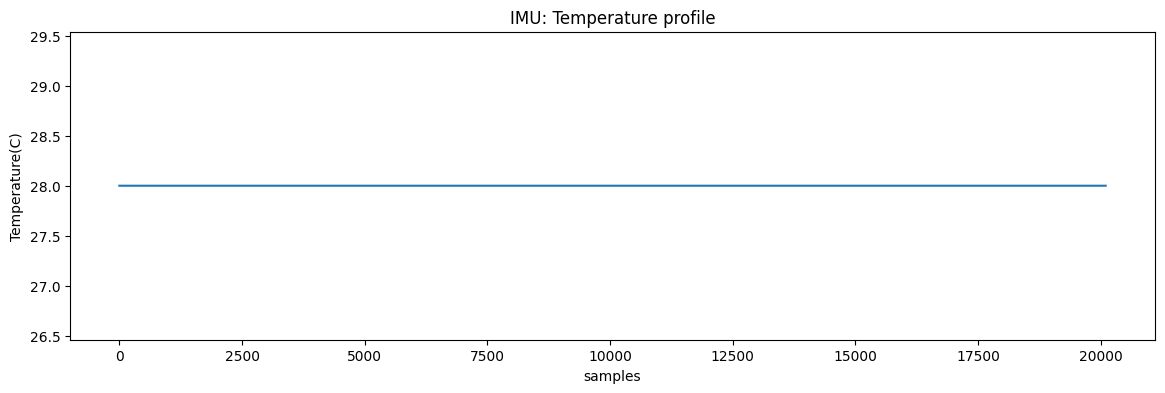

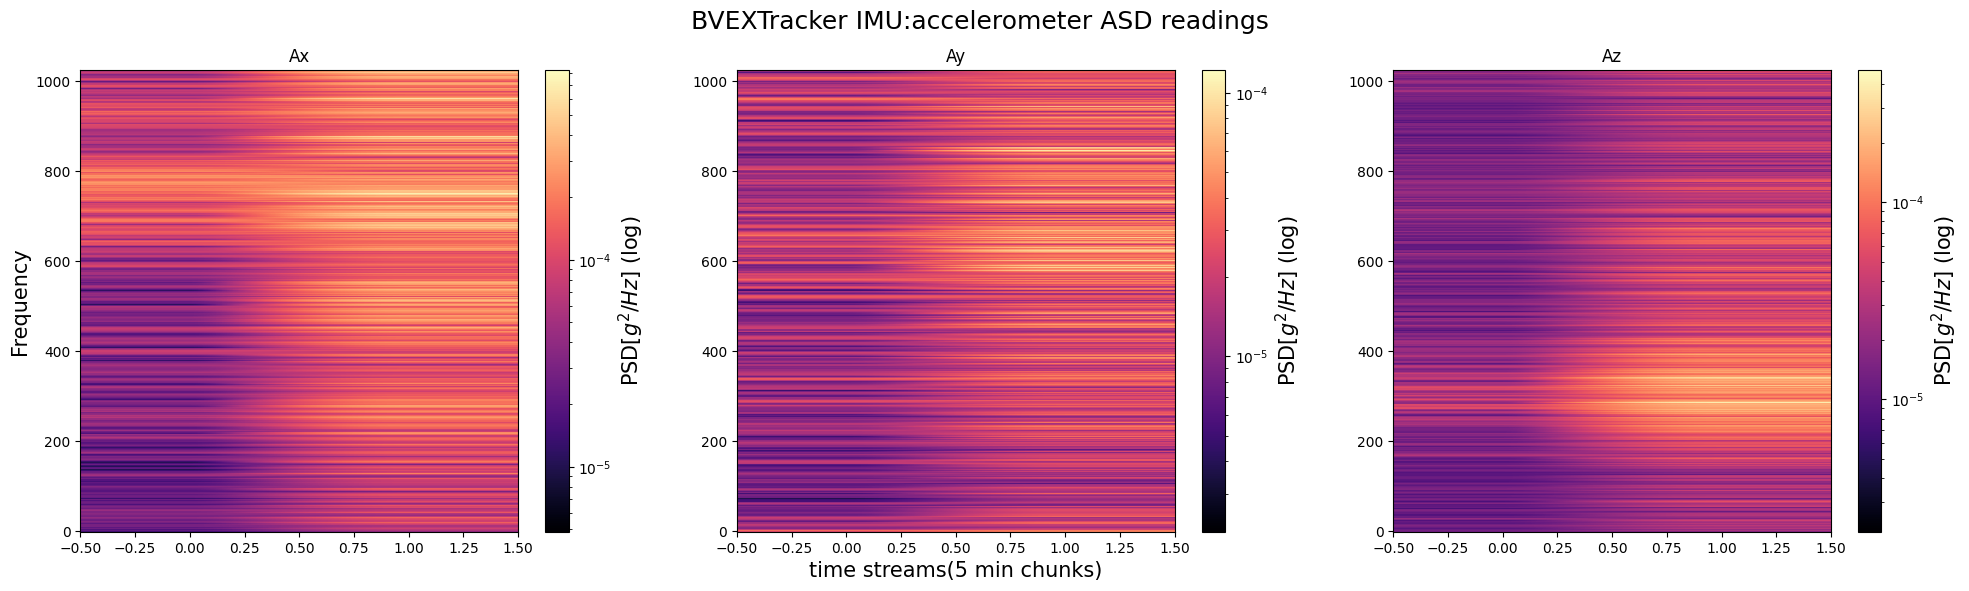

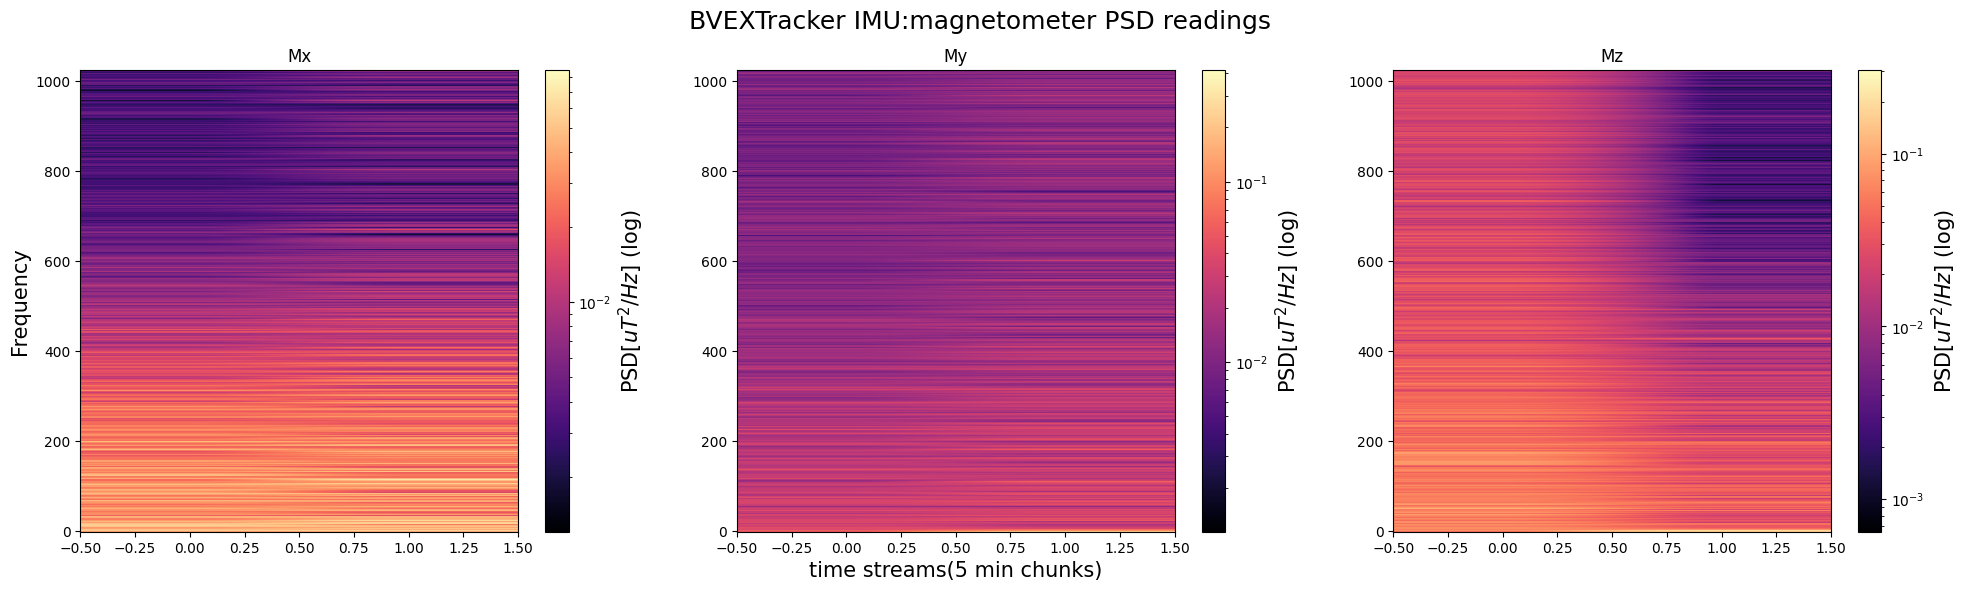

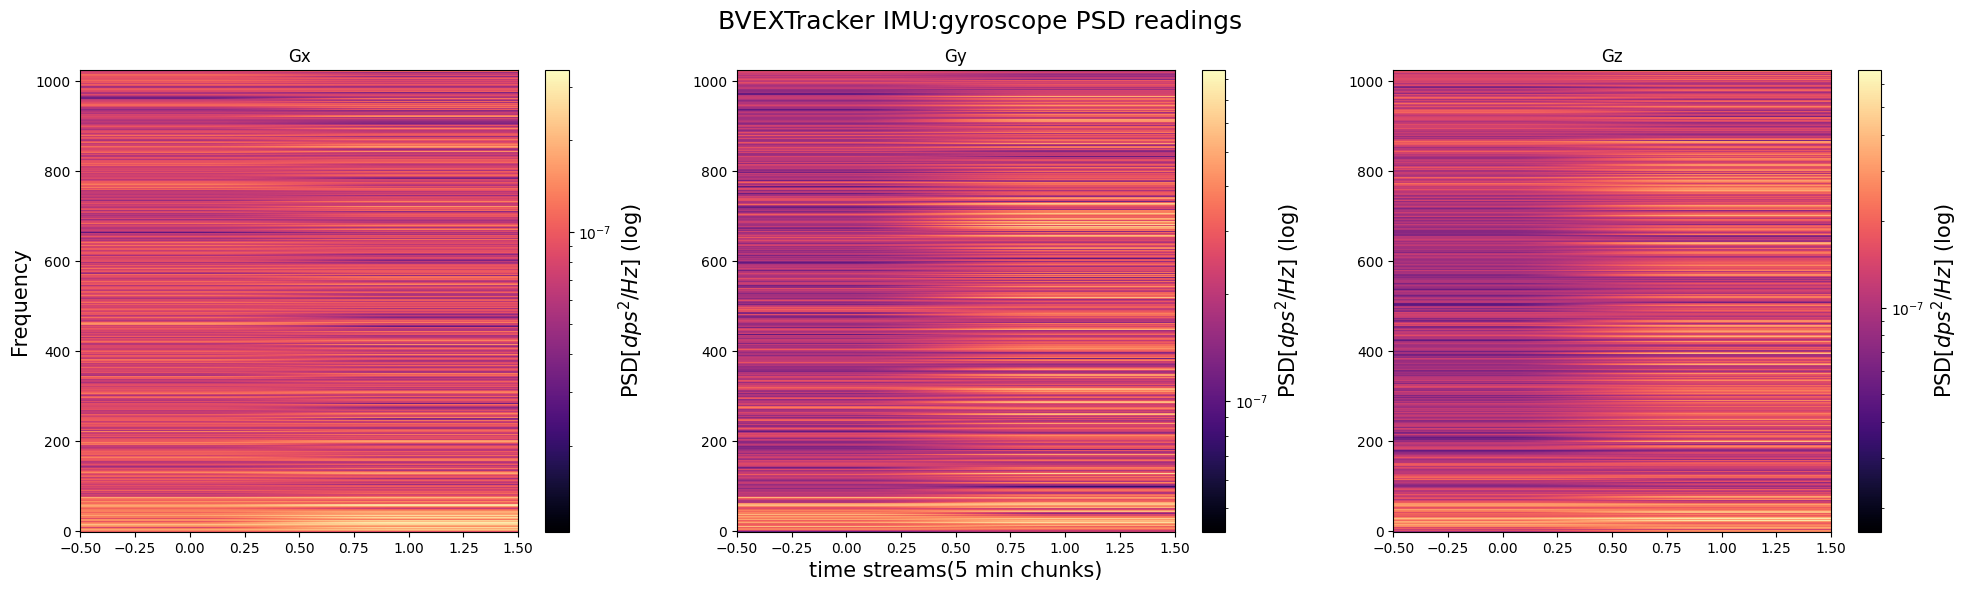

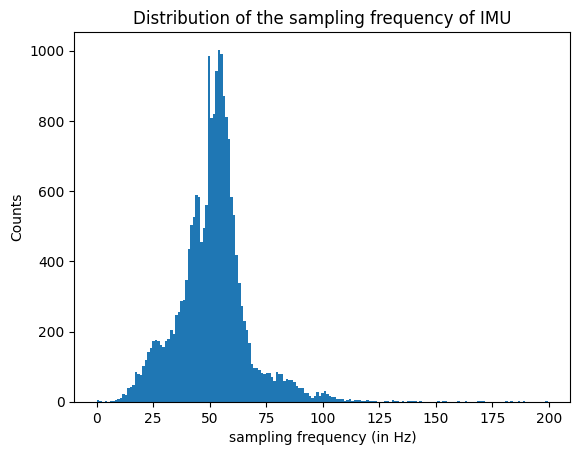

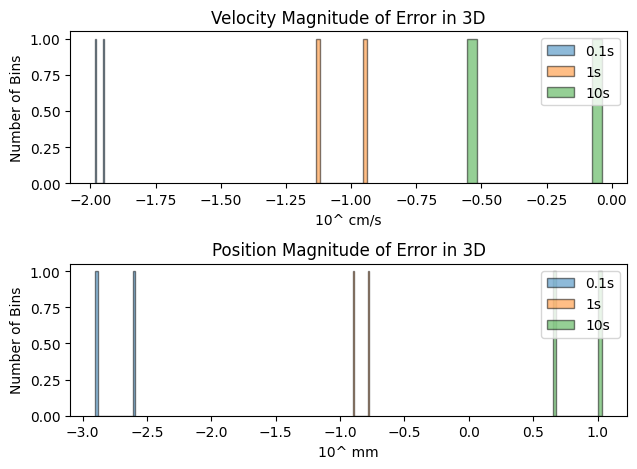

---Accelerometer stats(m/s^2)-------------
RMS ax: 9.757427460144351
RMS ay: 0.5810549693301081
RMS az: 0.03846983972791481
Std dev ax: 0.04925313468217118
median ax: 9.752082824707031
Std dev ay: 0.020941029908854807
median ay: 0.5801239013671875
Std dev az: 0.02766288560174053
median az: 0.03000640869140625
---Magnetometer stats(uT)-------------
RMS mx: 39.811023363255885
RMS my: 13.031937489942932
RMS mz: 17.255148057069547
Std dev mx: 0.6053441771533565
median mx: -39.75
Std dev my: 0.718345934911947
median my: -13.1875
Std dev mz: 0.8557358518027935
median mz: 17.375
---Gyroscope stats(dps)-------------
RMS gx: 0.001499464219896049
RMS gy: 0.002440997066570271
RMS gz: 0.0018412218241324282
Std dev gx: 0.001498876797613686
median gx: 0.0
Std dev gy: 0.0024405954537111687
median gy: 0.0
Std dev gz: 0.0018406256938089368
median gz: 0.0
---Euler angles stats(degrees)-------------
RMS roll: 125.83828012545888
RMS pitch: 86.73990695666144
RMS yaw: 3.266402075359044
---Temperature stats(

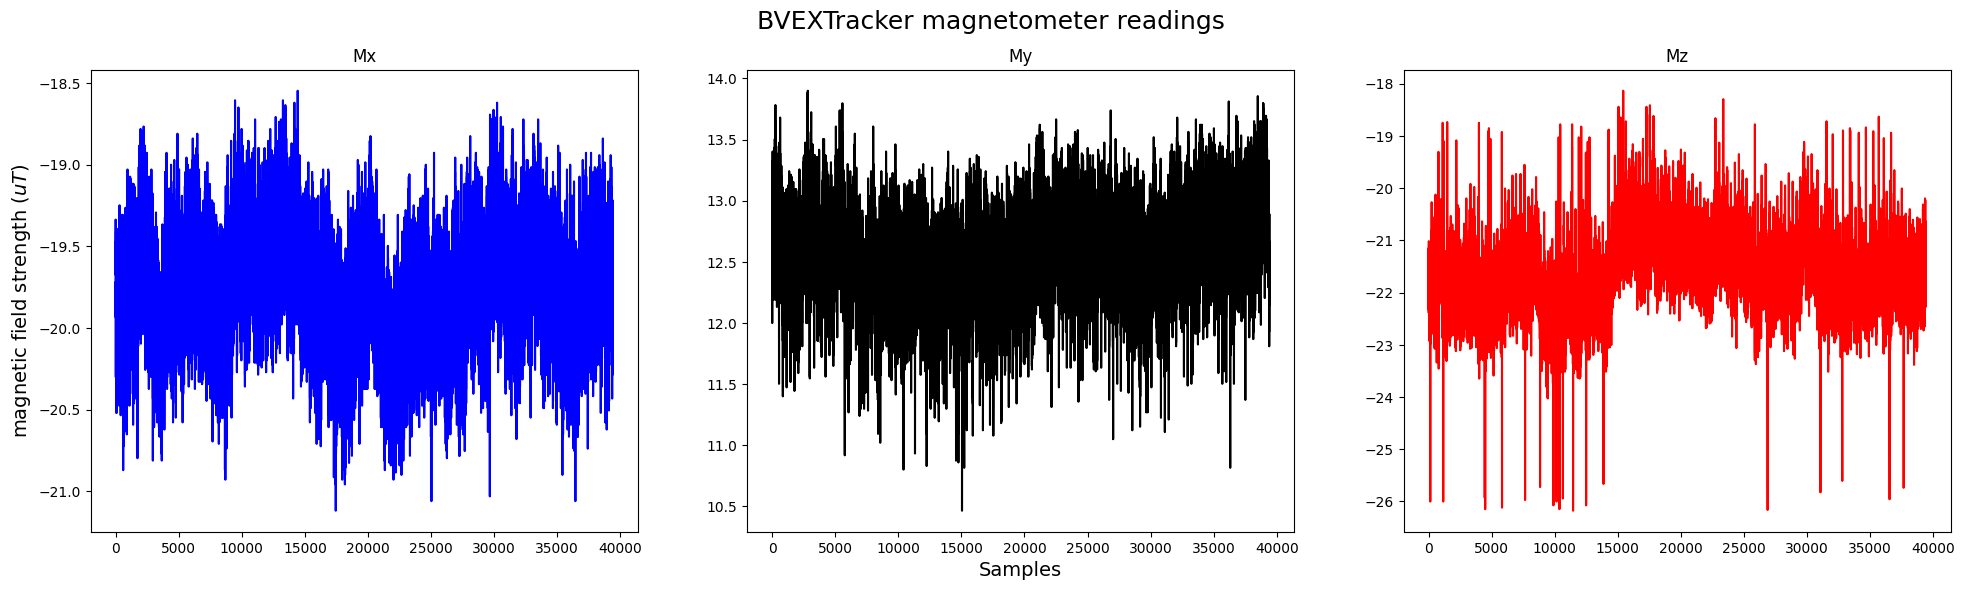

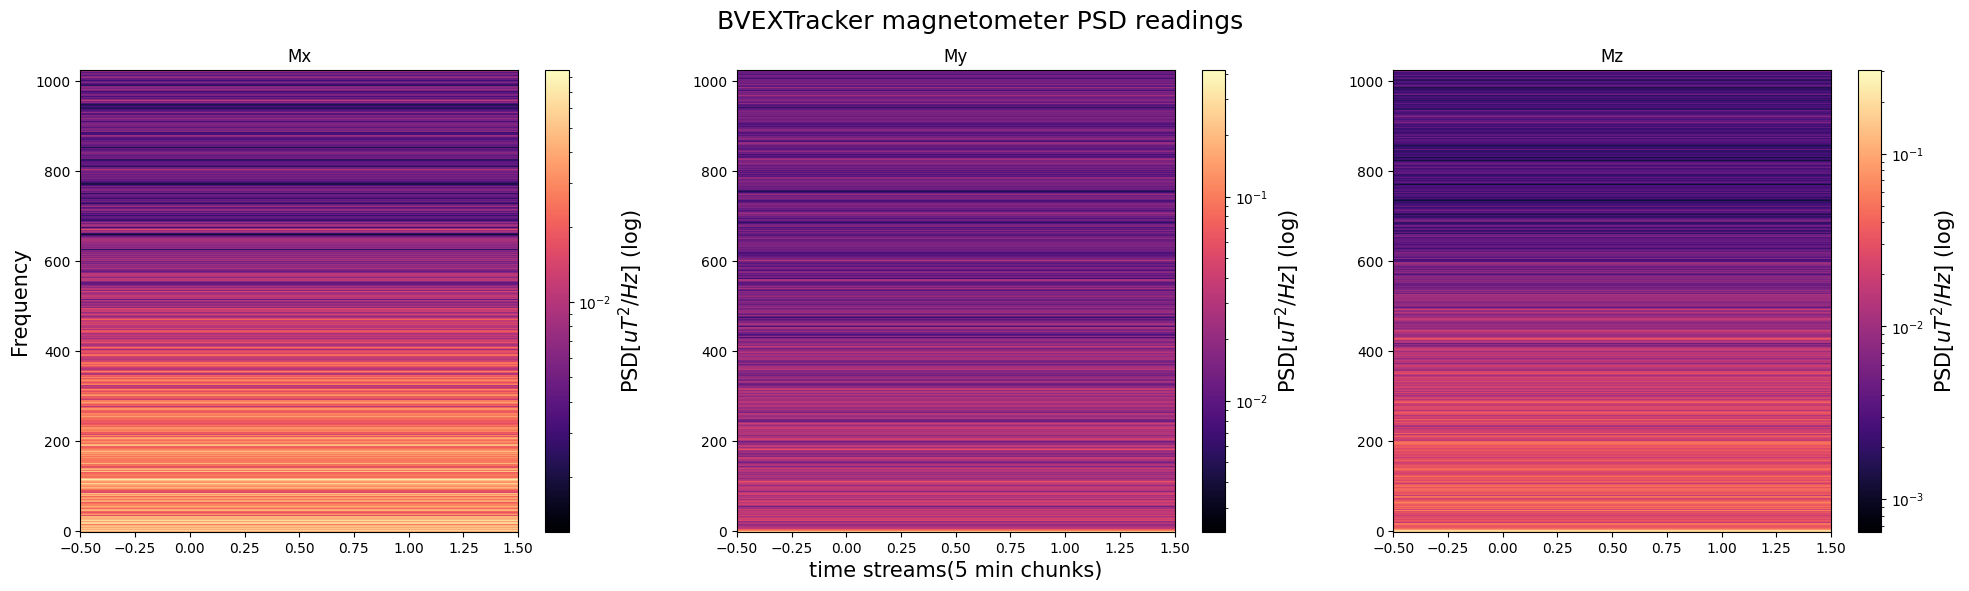

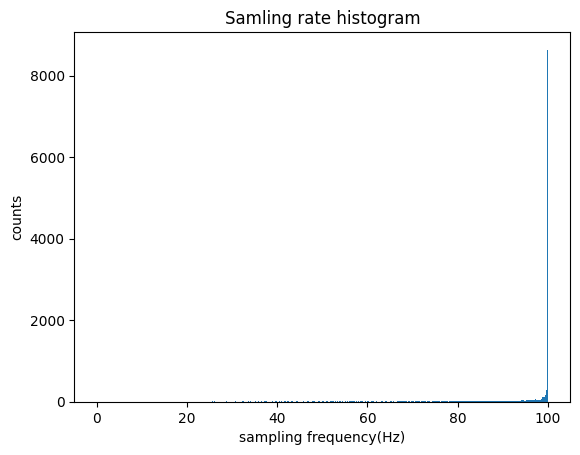

---Magnetometer stats(uT)-------------
RMS mx: 19.772197378844847
RMS my: 12.571282624504981
RMS mz: 21.631910137512946
Std dev mx: 0.33414610798343847
median mx: -19.774919509887695
Std dev my: 0.3654207423823624
median my: 12.56942367553711
Std dev mz: 0.668852369052425
median mz: -21.631101608276367


In [14]:
#--------------------------------------------------------------------- NOTES ----------------------------------------------------------------------------------------

# This script displays all the combined sensor data for each of the sensor type : Accelerometer, gyroscope, IMU and magnetometer. Simply feed the test file path 
# and it should run. the raw sensor data can be found in the : "sensorname_axis" list for example all the x axis accelerometer data for a particular run can be found in the 
# "axx" list and all the y axis gyroscope data can be found in the "gyy" list. 

#-------------------------------------------------------------------  libraries  -------------------------------------------------------------------------------------

import os
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
from matplotlib.colors import LogNorm
from datetime import datetime
import struct
from scipy import integrate
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#-------------------------------------------------------------------- input the test file name ----------------------------------------------------------------------
test_file='output_12_4'
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------

print("-------------------------------------------------------------------------------------------------------------------------------------------------------------")
print("------------------------------------------------------------------ ACCELEROMETER ----------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------")

def get_file_names_in_folder(folder_path):
    try:
        # Get a list of all file names in the folder
        file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        return file_names
    except OSError as e:
        print(f"Error: {e}")
        return []

# Replace 'folder_path' with the actual path of the folder you want to list files from
folder_path = test_file+'/Accelerometer'
file_names_list = get_file_names_in_folder(folder_path)

if file_names_list:
    print("List of file names in the folder:")
    for file_name in file_names_list:
        print(file_name)
else:
    print("No files found in the folder.")

# file_names_list=np.array(file_names_list)

# file_names_list = file_names_list.astype(int)

# file_names_list 


axx =[]
ayy =[]
azz =[]

axalllist=[]

fsslist =[]
tlist=[]
timealllist=[]
timezerodatalist=[]

psdax_list =[]
psday_list=[]
psdaz_list =[]

ssdax_list =[]
ssday_list=[]
ssdaz_list =[]

fxlist =[]
fylist =[]
fzlist =[]

vxx =[]
vyy =[]
vzz =[]

dxx =[]
dyy=[]
dzz=[]

verr01 =[]
verr1 =[]
verr10 = []

derr01 =[]
derr1=[]
derr10 =[]

vstatss01 =[]
vstatss1 =[]
vstatss10 = []

dstatss01 =[]
dstatss1 =[]
dstatss10 =[]



def read_file(file):
    data = []
    while True:
        try:
            bin_dat = file.read(20)
            if not bin_dat:
                break
            raw_dat = struct.unpack("<diii", bin_dat)
            data += [struct.unpack("<diii", bin_dat)]
        except Exception as e:
            print(e)
            print("got error reading data, returned processed data")
            return data
    return data

for i in file_names_list:

    with open(folder_path+'/'+i, "rb") as f:
        
        temp = 0
        data = read_file(f)
        time = []
        timezerodata=[]
        timeall =[]
        axall=[]
        ax = []
        ay = []
        az = []
        for line in data:
            timeall += [line[0]]
            axall += [line[1]*16.384 * 2 / 2**20] 
            if line[0] !=0:
                time += [line[0]]

                ax += [line[1]*2.048 * 2 / 2**20] 
                ay += [line[2]*2.048 * 2 / 2**20] 
                az += [line[3]*2.048 * 2 / 2**20]  
            else:
                timezerodata +=[line[0]]


    time_span = np.diff(time)
    mean_time_span = np.mean(time_span)
    fss = 1/ time_span
    mean_fss = np.mean(fss)

    print("mean dt :", mean_time_span," s")
    print("mean sampling rate :",mean_fss, "Hz")
    print("total samples",len(time))



    fs= mean_fss # Hz
    win = 2048

    fx,psdax = signal.welch(ax,fs,nperseg=win)
    fy,psday = signal.welch(ay,fs,nperseg=win)
    fz,psdaz = signal.welch(az,fs,nperseg=win)


    ax_mean = np.mean(ax)
    ay_mean = np.mean(ay)
    az_mean = np.mean(az)

    ax_avg = az - ax_mean
    ay_avg = ay - ay_mean
    az_avg = az - az_mean

    # create empty lists to put data in for 0.1s 
    vx01 = []
    vy01 = []
    vz01 = []

    dx01 = []
    dy01 = []
    dz01 = []

    # 1s
    vx1 = []
    vy1 = []
    vz1 = []

    dx1 = []
    dy1 = []
    dz1 = []

    # 10s
    vx10 = []
    vy10 = []
    vz10 = []

    dx10 = []
    dy10 = []
    dz10 = []

    t = time
    x = ax
    y = ay 
    z = az 


    t01 = np.where(t == 101)  # where t = 0.1s
    t1 = np.where(t == 1002)
    t10 = np.where(t == 10000)

    xmean = np.mean(ax)
    ymean = np.mean(ay)
    zmean = np.mean(az)

    xavg = x-xmean
    xshape = np.reshape(xavg,len(xavg))
    yavg = y-ymean
    yshape = np.reshape(yavg,len(yavg))
    zavg = z-zmean
    zshape = np.reshape(zavg,(len(zavg)))
    tshape = np.reshape(t, len(t))

    vx = np.array(1/1000 * integrate.cumtrapz(xshape, initial=1))   # integrate over 1 ms
    vy = np.array(1/1000 * integrate.cumtrapz(yshape, initial=1))
    vz = np.array(1/1000 * integrate.cumtrapz(zshape, initial=1))   # same length array as t

    dx = np.array(1/1000 * integrate.cumtrapz(vx, initial=1))
    dy = np.array(1/1000 * integrate.cumtrapz(vy, initial=1))
    dz = np.array(1/1000 * integrate.cumtrapz(vz, initial=1))  

    vx01.append(vx[32])   # list value where t=0.1
    vy01.append(vy[32])
    vz01.append(vz[32])

    dx01.append(dx[32])
    dy01.append(dy[32])
    dz01.append(dz[32])

    vx1.append(vx[297])  # where t=1
    vy1.append(vy[297])
    vz1.append(vz[297])

    dx1.append(dx[297])
    dy1.append(dy[297])
    dz1.append(dz[297])

    vx10.append(vx[2875])  # where t=10
    vy10.append(vy[2875])
    vz10.append(vz[2875])

    dx10.append(dx[2875])
    dy10.append(dy[2875])
    dz10.append(dz[2875])


    # convert to arrays
    # 0.1 s
    vxarr01 = np.array(np.abs(vx01))
    vyarr01 = np.array(np.abs(vy01))
    vzarr01 = np.array(np.abs(vz01))

    dxarr01 = np.array(np.abs(dx01))
    dyarr01 = np.array(np.abs(dy01))
    dzarr01 = np.array(np.abs(dz01))

    # 1s
    vxarr1 = np.array(np.abs(vx1))
    vyarr1 = np.array(np.abs(vy1))
    vzarr1 = np.array(np.abs(vz1))

    dxarr1 = np.array(np.abs(dx1))
    dyarr1 = np.array(np.abs(dy1))
    dzarr1 = np.array(np.abs(dz1))

    # 10 s
    vxarr10 = np.array(np.abs(vx10))
    vyarr10 = np.array(np.abs(vy10))
    vzarr10 = np.array(np.abs(vz10))

    dxarr10 = np.array(np.abs(dx10))
    dyarr10 = np.array(np.abs(dy10))
    dzarr10 = np.array(np.abs(dz10))


    # magnitude of error at 0.1s
    mag_errv01 = np.sqrt((vxarr01*100)**2 + (vyarr01*100)**2 + (vzarr01*100)**2)  # cm/s
    mag_errd01 = np.sqrt((dxarr01*1000)**2 + (dyarr01*1000)**2 + (dzarr01*1000)**2)  # mm

    # magnitude of error at 1 s
    mag_errv1 = np.sqrt((vxarr1*100)**2 + (vyarr1*100)**2 + (vzarr1*100)**2)  # cm/s
    mag_errd1 = np.sqrt((dxarr1*1000)**2 + (dyarr1*1000)**2 + (dzarr1*1000)**2)  # mm

    # magnitude of error at 10 s
    mag_errv10 = np.sqrt((vxarr10*100)**2 + (vyarr10*100)**2 + (vzarr10*100)**2)  # cm/s
    mag_errd10 = np.sqrt((dxarr10*1000)**2 + (dyarr10*1000)**2 + (dzarr10*1000)**2)  # mm


    # # log transform data to evenly distribute
    # fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

    log_verr01 = np.log10(mag_errv01)
    log_verr1 = np.log10(mag_errv1)
    log_verr10 = np.log10(mag_errv10)

    log_derr01 = np.log10(mag_errd01)
    log_derr1 = np.log10(mag_errd1)
    log_derr10 = np.log10(mag_errd10)

    
# #----------------------------------------appending all dara----------------------------    
    
    fsslist.append(fss)
    
    axx.append(ax)
    ayy.append(ay)
    azz.append(az)
    tlist.append(time)
    timealllist.append(timeall)
    timezerodatalist.append(timezerodata)
    
    axalllist.append(axall)

    psdax_list.append(psdax)
    psday_list.append(psday)
    psdaz_list.append(psdaz)
    
    # ssdax_list.append(Sxx)
    # ssday_list.append(Syy)
    # ssdaz_list.append(Szz)

    fxlist.append(fx)
    fylist.append(fy)
    fzlist.append(fy)

    vxx.append(vx)
    vyy.append(vy)
    vzz.append(vz)

    dxx.append(dx)
    dyy.append(dy)
    dzz.append(dz)

    verr01.append(log_verr01)
    verr1.append(log_verr1)
    verr10.append(log_verr10)

    derr01.append(log_derr01)
    derr1.append(log_derr1)
    derr10.append(log_derr10)
    
#-------------------------------------list flatenning and array mods-----------------------------    
    
def flatten_list(nested_list):
    flattened_list = []
    for item in nested_list:
        if isinstance(item, list):
            flattened_list.extend(flatten_list(item))
        else:
            flattened_list.append(item)
    return flattened_list

axx = flatten_list(axx)
ayy = flatten_list(ayy)
azz = flatten_list(azz)

#fsslist = flatten_list(fsslist)

psdax_list = np.array(psdax_list)
psday_list = np.array(psday_list)
psdaz_list = np.array(psdaz_list)

verr01= flatten_list(verr01)


def flatten_arrays_list(arrays_list):
    flattened_list = np.concatenate(arrays_list).ravel()
    return flattened_list

fsslist = flatten_arrays_list(fsslist)
timealllist= flatten_arrays_list(timealllist)
tlist = flatten_arrays_list(tlist)

axalllist = flatten_arrays_list(axalllist)
timezerodatalist = flatten_arrays_list(timezerodatalist)


verr01 = flatten_arrays_list(verr01)
verr1 = flatten_arrays_list(verr1)
verr10 = flatten_arrays_list(verr10)

derr01 = flatten_arrays_list(derr01)
derr1 = flatten_arrays_list(derr1)
derr10 = flatten_arrays_list(derr10)

dxx = flatten_arrays_list(dxx)
dyy = flatten_arrays_list(dyy)
dzz = flatten_arrays_list(dzz)


#-------------------------------plotting data--------------------------------

fig, axs = plt.subplots(1,3,sharex=True,figsize=(24,6))
fig.suptitle('BVEXTracker accelerometer readings',size=18)

axs[0].plot(axx,color = 'blue')
axs[0].set_title("Ax")


axs[1].plot(ayy,color = 'black')
axs[1].set_title("Ay")

axs[2].plot(azz,color = 'red')
axs[2].set_title("Az")

axs[1].set_xlabel('Samples',size=14)
axs[0].set_ylabel(r'acceleration ($m/s^2$)',size=14)


#plt.savefig("imuasd.png",dpi="figure")
plt.show()



fig, axs = plt.subplots(1,3,sharex=True,figsize=(24,6))
fig.suptitle('BVEXTracker position reconstruction',size=18)

axs[0].plot(dxx,color = 'blue')
axs[0].set_title("Ax")


axs[1].plot(dyy,color = 'black')
axs[1].set_title("Ay")

axs[2].plot(dzz,color = 'red')
axs[2].set_title("Az")

axs[1].set_xlabel('Samples',size=14)
axs[0].set_ylabel(r'acceleration ($m$)',size=14)


#plt.savefig("imuasd.png",dpi="figure")
plt.show()



fig, axs = plt.subplots(1,3,sharex=True,figsize=(24,6))
fig.suptitle('BVEXTracker accelerometer readings',size=18)

ps1=axs[0].imshow(psdax_list.T,norm=LogNorm(),origin="lower",cmap='magma',aspect="auto")
axs[0].set_title("Ax")
cb1=fig.colorbar(ps1)
cb1.set_label(label='PSD[$g^2/Hz$] (log)', size='15')

ps2=axs[1].imshow(psday_list.T,norm=LogNorm(),origin="lower",cmap='magma',aspect="auto")
axs[1].set_title("Ay")
cb2=fig.colorbar(ps2)
cb2.set_label(label='PSD[$g^2/Hz$] (log)', size='15')

ps3=axs[2].imshow(psdaz_list.T,norm=LogNorm(),origin="lower",cmap='magma',aspect="auto")
axs[2].set_title("Az")
cb3=fig.colorbar(ps3)
cb3.set_label(label='PSD[$g^2/Hz$] (log)', size='15')

axs[0].set_ylabel('Frequency',size=15)
axs[1].set_xlabel('time streams(5 min chunks)',size=15)


#plt.savefig("imuasd.png",dpi="figure")
plt.show()


plt.title("Samling rate histogram without a zero in timestamps")
plt.xlabel("sampling frequency(Hz)")
plt.ylabel("counts")
plt.hist(fsslist,bins="auto")
plt.show()

plt.title("histogram of time steps")
plt.hist(np.diff(timealllist),range=[0, 0.002],bins="auto")
plt.ylabel("Counts")
plt.xlabel("Time steps")
plt.show()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

# velocity magnitude of error
n1, bins01, patches = ax1.hist(verr01, bins=14, label='0.1s',alpha=0.5,zorder=5, histtype='bar', ec='black')
n2, bins1, patches = ax1.hist(verr1, bins=14, label='1s',alpha=0.5, histtype='bar', ec='black')
n3, bins10, patches = ax1.hist(verr10, bins=14, label='10s',alpha=0.5, histtype='bar', ec='black')
ax1.legend()
ax1.set_xscale('linear')
ax1.set_ylabel('Number of Bins')
ax1.set_title('Velocity Magnitude of Error in 3D')
ax1.set_xlabel('10^ cm/s')

nd1, binsd01, patchesd = ax2.hist(derr01, bins=14, label='0.1s',alpha=0.5, histtype='bar', ec='black')
nd2, binsd1, patchesd = ax2.hist(derr1, bins=14, label='1s',alpha=0.5, histtype='bar', ec='black')
nd3, binsd10, patchesd = ax2.hist(derr10, bins=14, label='10s',alpha=0.5, histtype='bar', ec='black')
ax2.legend()
ax2.set_xlabel('10^ mm')
ax2.set_ylabel('Number of Bins')
ax2.set_title('Position Magnitude of Error in 3D')
ax2.set_xscale('linear')

bin_centers = 0.5*(bins01[1:]+bins01[:-1])
sqrtn1 = np.sqrt(n1)

plt.tight_layout()

plt.show()

plt.title("Variation of the Sampling rate")
plt.plot(fsslist)
plt.ylabel("Sampling frequency")
plt.xlabel("samples")
plt.show()

print(len(tlist)/len(timealllist) *100,"% of data does not have zero as its time")


def calculate_rms(accel_data):
    squared_data = np.square(accel_data)
    mean_squared = np.mean(squared_data)
    rms_value = np.sqrt(mean_squared)
    return rms_value

axx_rms = calculate_rms(axx)
ayy_rms = calculate_rms(ayy)
azz_rms = calculate_rms(azz)

print("RMS ax:",axx_rms)
print("RMS ay:",ayy_rms)
print("RMS az:",azz_rms)

print(timealllist[2000]-timealllist[1000])
print(timealllist[3000]-timealllist[2000])
print(timealllist[4000]-timealllist[3000])

print("-------------------------------------------------------------------------------------------------------------------------------------------------------------")
print("------------------------------------------------------------------ GYROSCOPE ----------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------")


def get_file_names_in_folder(folder_path):
    try:
        # Get a list of all file names in the folder
        file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        return file_names
    except OSError as e:
        print(f"Error: {e}")
        return []

# Replace 'folder_path' with the actual path of the folder you want to list files from
folder_path = test_file+'/Gyroscope/'
file_names_list = get_file_names_in_folder(folder_path)

if file_names_list:
    print("List of file names in the folder:")
    for file_name in file_names_list:
        print(file_name)
else:
    print("No files found in the folder.")

# file_names_list=np.array(file_names_list)

# file_names_list = file_names_list.astype(int)

# file_names_list 


axx =[]
ayy =[]
azz =[]

fsslist =[]

psdax_list =[]
psday_list=[]
psdaz_list =[]

ssdax_list =[]
ssday_list=[]
ssdaz_list =[]

fxlist =[]
fylist =[]
fzlist =[]

def read_file(file):
    data = []
    while True:
        try:
            bin_dat = file.read(14)
            if not bin_dat:
                break
            raw_dat = struct.unpack("<dHHH", bin_dat)
            data += [struct.unpack("<dHHH", bin_dat)]
        except Exception as e:
            print(e)
            print("got error reading data, returned processed data")
            #return data
    return data

for i in file_names_list:

    with open(folder_path+'/'+i, "rb") as f:
        temp = 0
        data = read_file(f)
        time = []
        ax = []
        ay = []
        az = []
        for line in data:
            time += [line[0]]
            
            ax += [np.int16(line[1])*0.00875+ 1.25617] #degrees per second
            ay += [np.int16(line[2])*0.00875- 1.65475] 
            az += [np.int16(line[3])*0.00875- 0.48935]   


    time_span = np.diff(time)
    mean_time_span = np.mean(time_span)
    fss = 1/ time_span
    mean_fss = np.mean(fss)

    print("mean dt :", mean_time_span," s")
    print("mean sampling rate :",mean_fss, "Hz")
    print("total samples",len(time))


    fs= mean_fss # Hz
    win = 2048

    fx,psdax = signal.welch(ax,fs,nperseg=win)
    fy,psday = signal.welch(ay,fs,nperseg=win)
    fz,psdaz = signal.welch(az,fs,nperseg=win)


#----------------------------------------appending all dara----------------------------    
    
    fsslist.append(fss)
    
    axx.append(ax)
    ayy.append(ay)
    azz.append(az)

    psdax_list.append(psdax)
    psday_list.append(psday)
    psdaz_list.append(psdaz)
    
    # ssdax_list.append(Sxx)
    # ssday_list.append(Syy)
    # ssdaz_list.append(Szz)

    fxlist.append(fx)
    fylist.append(fy)
    fzlist.append(fy)
    
#-------------------------------------list flatenning and array mods-----------------------------    
    
def flatten_list(nested_list):
    flattened_list = []
    for item in nested_list:
        if isinstance(item, list):
            flattened_list.extend(flatten_list(item))
        else:
            flattened_list.append(item)
    return flattened_list

axx = flatten_list(axx)
ayy = flatten_list(ayy)
azz = flatten_list(azz)

#fsslist = flatten_list(fsslist)

# psdax_list = np.array(psdax_list)
# psday_list = np.array(psday_list)
# psdaz_list = np.array(psdaz_list)

#verr01= flatten_list(verr01)


def flatten_arrays_list(arrays_list):
    flattened_list = np.concatenate(arrays_list).ravel()
    return flattened_list

fsslist = flatten_arrays_list(fsslist)
psdax_list = flatten_arrays_list(psdax_list)
psday_list = flatten_arrays_list(psday_list)
psdaz_list = flatten_arrays_list(psdaz_list)


# verr01 = flatten_arrays_list(verr01)
# verr1 = flatten_arrays_list(verr1)
# verr10 = flatten_arrays_list(verr10)

# derr01 = flatten_arrays_list(derr01)
# derr1 = flatten_arrays_list(derr1)
# derr10 = flatten_arrays_list(derr10)

#-------------------------------plotting data--------------------------------

fig, axs = plt.subplots(1,3,sharex=True,figsize=(24,6))
fig.suptitle('BVEXTracker gyroscope readings',size=18)

axs[0].plot(axx,color = 'blue')
axs[0].set_title("Gx")


axs[1].plot(ayy,color = 'black')
axs[1].set_title("Gy")

axs[2].plot(azz,color = 'red')
axs[2].set_title("Gz")

axs[1].set_xlabel('Samples',size=14)
axs[0].set_ylabel(r'angular acceleration ($dps$)',size=14)


#plt.savefig("imuasd.png",dpi="figure")
plt.show()


plt.hist(fsslist,range=[0,300],bins="auto")
plt.title("Distribution of the sampling frequency Gyroscope")
plt.xlabel("sampling frequency (in Hz)")
plt.ylabel("Counts")
plt.show()

print("-------------------------------------------------------------------------------------------------------------------------------------------------------------")
print("------------------------------------------------------------------ IMU --------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------")


def get_file_names_in_folder(folder_path):
    try:
        # Get a list of all file names in the folder
        file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        return file_names
    except OSError as e:
        print(f"Error: {e}")
        return []

# Replace 'folder_path' with the actual path of the folder you want to list files from
folder_path = test_file+'/IMU/'
file_names_list = get_file_names_in_folder(folder_path)

if file_names_list:
    #print("List of file names in the folder:")
    for file_name in file_names_list:
        print(file_name)
else:
    print("No files found in the folder.")
    
#print("Total files analyzed:",len(file_name_list))

# file_names_list=np.array(file_names_list)

# file_names_list = file_names_list.astype(int)

# file_names_list 


axx =[]
ayy =[]
azz =[]

mxx=[]
myy=[]
mzz=[]

gxx=[]
gyy=[]
gzz=[]

roll_list=[]
pitch_list=[]
yaw_list=[]

tempa_list=[]

fsslist =[]
tlist=[]
timealllist=[]
timezerodatalist=[]

psdax_list =[]
psday_list=[]
psdaz_list =[]

psdmx_list=[]
psdmy_list=[]
psdmz_list=[]

psdgx_list=[]
psdgy_list=[]
psdgz_list=[]

ssdax_list =[]
ssday_list=[]
ssdaz_list =[]

fxlist =[]
fylist =[]
fzlist =[]

vxx =[]
vyy =[]
vzz =[]

dxx =[]
dyy=[]
dzz=[]

verr01 =[]
verr1 =[]
verr10 = []

derr01 =[]
derr1=[]
derr10 =[]

vstatss01 =[]
vstatss1 =[]
vstatss10 = []

dstatss01 =[]
dstatss1 =[]
dstatss10 =[]

mean_timespanlist=[]
mean_samplinglist=[]


def read_file(file):
    data=[]
    while True:
        try:
            temp  = []
            bin_dat = file.read(8)
            temp += struct.unpack("<d", bin_dat)

            bin_dat = file.read(12)
            temp += struct.unpack("<fff", bin_dat)#[i*scales["acceleration"] for i in struct.unpack("<fff", bin_dat)]

            bin_dat = file.read(12)
            temp +=struct.unpack("<fff", bin_dat)#[i*scales["magnetic"] for i in struct.unpack("<fff", bin_dat)]

            bin_dat = file.read(12)
            temp += struct.unpack("<fff", bin_dat)#[i*scales["gyro"] for i in struct.unpack("<fff", bin_dat)]

            bin_dat = file.read(12)
            temp += struct.unpack("<fff", bin_dat) #[i*scales["euler"] for i in struct.unpack("<fff", bin_dat)]
            
            bin_dat = file.read(4)
            temp += struct.unpack("<f", bin_dat) #[i*scales["euler"] for i in struct.unpack("<fff", bin_dat)]

            data += [temp]
        except Exception as e:
            #print(e)
            #print("IMU: got error reading data, returned processed data")
            return data
    return data

for i in file_names_list:

    with open(folder_path+'/'+i, "rb") as f:
        temp = 0
    
        data = read_file(f)
        time = []

        ax = [] #m/s^2
        ay = []
        az = []

        mx=[]  # uT
        my=[]
        mz=[]

        gx=[] #dps
        gy=[]
        gz=[]

        roll=[] #degrees
        pitch=[]
        yaw=[]

        tempa=[]
       
        for line in data:
            time += [line[0]]

            ax += [line[1]] 
            ay += [line[2]]
            az += [line[3]]   


            mx += [line[4]] 
            my += [line[5]] 
            mz += [line[6]] 


            gx += [line[7]] 
            gy += [line[8]] 
            gz += [line[9]] 

            roll += [line[10]] 
            pitch += [line[11]] 
            yaw += [line[12]] 

            tempa +=[line[13]]

            #fss = 1/np.diff(time)
    def remove_outliers(sensor_data, z_threshold=3):
        mean = np.mean(sensor_data)
        std_dev = np.std(sensor_data)

        # Identify the indices of outliers
        outlier_indices = np.where(np.abs((sensor_data - mean) / std_dev) > z_threshold)[0]

        # Remove outliers from the sensor data list using list comprehension
        cleaned_sensor_data = [value for idx, value in enumerate(sensor_data) if idx not in outlier_indices]

        return cleaned_sensor_data
    
    ax = remove_outliers(ax)
    ay = remove_outliers(ay)
    az = remove_outliers(az)
    
    mx = remove_outliers(mx)
    my = remove_outliers(my)
    mz = remove_outliers(mz)
    
    gx = remove_outliers(gx)
    gy = remove_outliers(gy)
    gz = remove_outliers(gz)
    
    roll = remove_outliers(roll)
    pitch = remove_outliers(pitch)
    yaw = remove_outliers(yaw)
    
    tempa = remove_outliers(tempa)


    time_span = np.diff(time)
    mean_time_span = np.mean(time_span)
    fss = 1/ time_span
    mean_fss = np.mean(fss)
    
    
    # print("mean dt :", mean_time_span," s")
    # print("mean sampling rate :",mean_fss, "Hz")
    # print("total samples",len(time))



    fs= mean_fss # Hz
    win = 2048

    fx,psdax = signal.welch(ax,fs,nperseg=win)
    fy,psday = signal.welch(ay,fs,nperseg=win)
    fz,psdaz = signal.welch(az,fs,nperseg=win)
    
    fx,psdmx = signal.welch(mx,fs,nperseg=win)
    fy,psdmy = signal.welch(my,fs,nperseg=win)
    fz,psdmz = signal.welch(mz,fs,nperseg=win)
    
    fx,psdgx = signal.welch(gx,fs,nperseg=win)
    fy,psdgy = signal.welch(gy,fs,nperseg=win)
    fz,psdgz = signal.welch(gz,fs,nperseg=win)


    ax_mean = np.mean(ax)
    ay_mean = np.mean(ay)
    az_mean = np.mean(az)

    ax_avg = az - ax_mean
    ay_avg = ay - ay_mean
    az_avg = az - az_mean

    # create empty lists to put data in for 0.1s 
    vx01 = []
    vy01 = []
    vz01 = []

    dx01 = []
    dy01 = []
    dz01 = []

    # 1s
    vx1 = []
    vy1 = []
    vz1 = []

    dx1 = []
    dy1 = []
    dz1 = []

    # 10s
    vx10 = []
    vy10 = []
    vz10 = []

    dx10 = []
    dy10 = []
    dz10 = []

    t = time
    x = ax
    y = ay 
    z = az 


    t01 = np.where(t == 101)  # where t = 0.1s
    t1 = np.where(t == 1002)
    t10 = np.where(t == 10000)

    xmean = np.mean(ax)
    ymean = np.mean(ay)
    zmean = np.mean(az)

    xavg = x-xmean
    xshape = np.reshape(xavg,len(xavg))
    yavg = y-ymean
    yshape = np.reshape(yavg,len(yavg))
    zavg = z-zmean
    zshape = np.reshape(zavg,(len(zavg)))
    tshape = np.reshape(t, len(t))

    vx = np.array(1/1000 * integrate.cumtrapz(xshape, initial=1))   # integrate over 1 ms
    vy = np.array(1/1000 * integrate.cumtrapz(yshape, initial=1))
    vz = np.array(1/1000 * integrate.cumtrapz(zshape, initial=1))   # same length array as t

    dx = np.array(1/1000 * integrate.cumtrapz(vx, initial=1))
    dy = np.array(1/1000 * integrate.cumtrapz(vy, initial=1))
    dz = np.array(1/1000 * integrate.cumtrapz(vz, initial=1))  

    vx01.append(vx[32])   # list value where t=0.1
    vy01.append(vy[32])
    vz01.append(vz[32])

    dx01.append(dx[32])
    dy01.append(dy[32])
    dz01.append(dz[32])

    vx1.append(vx[297])  # where t=1
    vy1.append(vy[297])
    vz1.append(vz[297])

    dx1.append(dx[297])
    dy1.append(dy[297])
    dz1.append(dz[297])

    vx10.append(vx[2243])  # where t=10
    vy10.append(vy[2243])
    vz10.append(vz[2243])

    dx10.append(dx[2243])
    dy10.append(dy[2243])
    dz10.append(dz[2243])


    # convert to arrays
    # 0.1 s
    vxarr01 = np.array(np.abs(vx01))
    vyarr01 = np.array(np.abs(vy01))
    vzarr01 = np.array(np.abs(vz01))

    dxarr01 = np.array(np.abs(dx01))
    dyarr01 = np.array(np.abs(dy01))
    dzarr01 = np.array(np.abs(dz01))

    # 1s
    vxarr1 = np.array(np.abs(vx1))
    vyarr1 = np.array(np.abs(vy1))
    vzarr1 = np.array(np.abs(vz1))

    dxarr1 = np.array(np.abs(dx1))
    dyarr1 = np.array(np.abs(dy1))
    dzarr1 = np.array(np.abs(dz1))

    # 10 s
    vxarr10 = np.array(np.abs(vx10))
    vyarr10 = np.array(np.abs(vy10))
    vzarr10 = np.array(np.abs(vz10))

    dxarr10 = np.array(np.abs(dx10))
    dyarr10 = np.array(np.abs(dy10))
    dzarr10 = np.array(np.abs(dz10))


    # magnitude of error at 0.1s
    mag_errv01 = np.sqrt((vxarr01*100)**2 + (vyarr01*100)**2 + (vzarr01*100)**2)  # cm/s
    mag_errd01 = np.sqrt((dxarr01*1000)**2 + (dyarr01*1000)**2 + (dzarr01*1000)**2)  # mm

    # magnitude of error at 1 s
    mag_errv1 = np.sqrt((vxarr1*100)**2 + (vyarr1*100)**2 + (vzarr1*100)**2)  # cm/s
    mag_errd1 = np.sqrt((dxarr1*1000)**2 + (dyarr1*1000)**2 + (dzarr1*1000)**2)  # mm

    # magnitude of error at 10 s
    mag_errv10 = np.sqrt((vxarr10*100)**2 + (vyarr10*100)**2 + (vzarr10*100)**2)  # cm/s
    mag_errd10 = np.sqrt((dxarr10*1000)**2 + (dyarr10*1000)**2 + (dzarr10*1000)**2)  # mm


    # # log transform data to evenly distribute
    # fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

    log_verr01 = np.log10(mag_errv01)
    log_verr1 = np.log10(mag_errv1)
    log_verr10 = np.log10(mag_errv10)

    log_derr01 = np.log10(mag_errd01)
    log_derr1 = np.log10(mag_errd1)
    log_derr10 = np.log10(mag_errd10)

    
# #----------------------------------------appending all dara----------------------------    
    
    fsslist.append(fss)
    
    axx.append(ax)
    ayy.append(ay)
    azz.append(az)
    
    mxx.append(mx)
    myy.append(my)
    mzz.append(mz)
    
    gxx.append(gx)
    gyy.append(gy)
    gzz.append(gz)
        
    roll_list.append(roll)
    pitch_list.append(pitch)
    yaw_list.append(yaw)
    
    tempa_list.append(tempa)
        
    tlist.append(time)
    #timealllist.append(timeall)
    #timezerodatalist.append(timezerodata)
    
    mean_timespanlist.append(mean_time_span)
    mean_samplinglist.append(mean_fss)

    
    #axalllist.append(axall)

    psdax_list.append(psdax)
    psday_list.append(psday)
    psdaz_list.append(psdaz)
    
    psdmx_list.append(psdmx)
    psdmy_list.append(psdmy)
    psdmz_list.append(psdmz)
    
    psdgx_list.append(psdgx)
    psdgy_list.append(psdgy)
    psdgz_list.append(psdgz)
    
    # ssdax_list.append(Sxx)
    # ssday_list.append(Syy)
    # ssdaz_list.append(Szz)

    fxlist.append(fx)
    fylist.append(fy)
    fzlist.append(fy)

    vxx.append(vx)
    vyy.append(vy)
    vzz.append(vz)

    dxx.append(dx)
    dyy.append(dy)
    dzz.append(dz)

    verr01.append(log_verr01)
    verr1.append(log_verr1)
    verr10.append(log_verr10)

    derr01.append(log_derr01)
    derr1.append(log_derr1)
    derr10.append(log_derr10)

#     vstatss01.append(vstats01)
#     vstatss1.append(vstats1)
#     vstatss10.append(vstats10)

#     dstatss01.append(pstats01)
#     dstatss1.append(pstats1)
#     dstatss10.append(pstats10)
    
#-------------------------------------list flatenning and array mods-----------------------------    
    
def flatten_list(nested_list):
    flattened_list = []
    for item in nested_list:
        if isinstance(item, list):
            flattened_list.extend(flatten_list(item))
        else:
            flattened_list.append(item)
    return flattened_list

axx = flatten_list(axx)
ayy = flatten_list(ayy)
azz = flatten_list(azz)


gxx = flatten_list(gxx)
gyy = flatten_list(gyy)
gzz = flatten_list(gzz)

mxx = flatten_list(mxx)
myy = flatten_list(myy)
mzz = flatten_list(mzz)

roll_list = flatten_list(roll_list)
pitch_list = flatten_list(pitch_list)
yaw_list = flatten_list(yaw_list)

tempa_list = flatten_list(tempa_list)

#fsslist = flatten_list(fsslist)

psdax_list = np.array(psdax_list)
psday_list = np.array(psday_list)
psdaz_list = np.array(psdaz_list)

psdmx_list = np.array(psdmx_list)
psdmy_list = np.array(psdmy_list)
psdmz_list = np.array(psdmz_list)

psdgx_list = np.array(psdgx_list)
psdgy_list = np.array(psdgy_list)
psdgz_list = np.array(psdgz_list)

verr01= flatten_list(verr01)


def flatten_arrays_list(arrays_list):
    flattened_list = np.concatenate(arrays_list).ravel()
    return flattened_list

fsslist = flatten_arrays_list(fsslist)
#timealllist= flatten_arrays_list(timealllist)
tlist = flatten_arrays_list(tlist)

# axalllist = flatten_arrays_list(axalllist)
# timezerodatalist = flatten_arrays_list(timezerodatalist)


verr01 = flatten_arrays_list(verr01)
verr1 = flatten_arrays_list(verr1)
verr10 = flatten_arrays_list(verr10)

derr01 = flatten_arrays_list(derr01)
derr1 = flatten_arrays_list(derr1)
derr10 = flatten_arrays_list(derr10)

dxx = flatten_arrays_list(dxx)
dyy = flatten_arrays_list(dyy)
dzz = flatten_arrays_list(dzz)


# mean_timespanlist = flatten_arrays_list(mean_timespanlist)
# mean_samplinglist = flatten_arrays_list(mean_timespanlist)

#-------------------------------plotting data--------------------------------


print("The mean dt for the whole data",np.mean(mean_timespanlist))
print("The mean sampling rate for the whole data",np.mean(mean_samplinglist))

fig, axs = plt.subplots(1,3,sharex=True,figsize=(24,6))
fig.suptitle('BVEXTracker IMU:accelerometer readings',size=18)

axs[0].plot(axx,color = 'blue')
axs[0].set_title("Ax")


axs[1].plot(ayy,color = 'black')
axs[1].set_title("Ay")

axs[2].plot(azz,color = 'red')
axs[2].set_title("Az")

axs[1].set_xlabel('Samples',size=14)
axs[0].set_ylabel(r'acceleration ($m/s^2$)',size=14)


plt.savefig("IMU:accelerometer_ax_ay_az.png",dpi="figure")
plt.show()



fig, axs = plt.subplots(1,3,sharex=True,figsize=(24,6))
fig.suptitle('BVEXTracker IMU position reconstruction',size=18)

axs[0].plot(dxx,color = 'blue')
axs[0].set_title("Dx")


axs[1].plot(dyy,color = 'black')
axs[1].set_title("Dy")

axs[2].plot(dzz,color = 'red')
axs[2].set_title("Dz")

axs[1].set_xlabel('Samples',size=14)
axs[0].set_ylabel(r'Displacement ($m$)',size=14)


plt.savefig("IMU:accelerometer_disp.png",dpi="figure")
plt.show()



fig, axs = plt.subplots(1,3,sharex=True,figsize=(24,6))
fig.suptitle('BVEXTracker IMU:magnetometer reading',size=18)

axs[0].plot(mxx,color = 'blue')
axs[0].set_title("Mx")


axs[1].plot(myy,color = 'black')
axs[1].set_title("My")

axs[2].plot(mzz,color = 'red')
axs[2].set_title("Mz")

axs[1].set_xlabel('Samples',size=14)
axs[0].set_ylabel(r'Magnetic field strength ($uT$)',size=14)


plt.savefig("IMU:magnetometer_mx_my_mz.png",dpi="figure")
plt.show()

fig, axs = plt.subplots(1,3,sharex=True,figsize=(24,6))
fig.suptitle('BVEXTracker IMU:Gyroscope reading',size=18)

axs[0].plot(gxx,color = 'blue')
axs[0].set_title("Gx")


axs[1].plot(gyy,color = 'black')
axs[1].set_title("Gy")

axs[2].plot(gzz,color = 'red')
axs[2].set_title("Gz")

axs[1].set_xlabel('Samples',size=14)
axs[0].set_ylabel(r'Degrees per second ($dps$)',size=14)


plt.savefig("IMU:gyroscope_gx_gy_gz.png",dpi="figure")
plt.show()


fig, axs = plt.subplots(1,3,sharex=True,figsize=(24,6))
fig.suptitle('BVEXTracker IMU:Euler angle reading',size=18)

axs[0].plot(roll_list,color = 'blue')
axs[0].set_title("Roll")


axs[1].plot(pitch_list,color = 'black')
axs[1].set_title("Pitch")

axs[2].plot(yaw_list,color = 'red')
axs[2].set_title("Yaw")

axs[1].set_xlabel('Samples',size=14)
axs[0].set_ylabel(r'Degrees',size=14)


plt.savefig("IMU:euler angles.png",dpi="figure")
plt.show()

plt.figure(figsize=(14,4))
plt.title("IMU: Temperature profile")
plt.plot(tempa_list)
plt.xlabel("samples")
plt.ylabel("Temperature(C)")

plt.savefig("IMU:temperature.png",dpi="figure")
plt.show()


fig, axs = plt.subplots(1,3,sharex=True,figsize=(24,6))
fig.suptitle('BVEXTracker IMU:accelerometer ASD readings',size=18)

ps1=axs[0].imshow(psdax_list.T,norm=LogNorm(),origin="lower",cmap='magma',aspect="auto")
axs[0].set_title("Ax")
cb1=fig.colorbar(ps1)
cb1.set_label(label='PSD[$g^2/Hz$] (log)', size='15')

ps2=axs[1].imshow(psday_list.T,norm=LogNorm(),origin="lower",cmap='magma',aspect="auto")
axs[1].set_title("Ay")
cb2=fig.colorbar(ps2)
cb2.set_label(label='PSD[$g^2/Hz$] (log)', size='15')

ps3=axs[2].imshow(psdaz_list.T,norm=LogNorm(),origin="lower",cmap='magma',aspect="auto")
axs[2].set_title("Az")
cb3=fig.colorbar(ps3)
cb3.set_label(label='PSD[$g^2/Hz$] (log)', size='15')

axs[0].set_ylabel('Frequency',size=15)
axs[1].set_xlabel('time streams(5 min chunks)',size=15)


plt.savefig("IMU:accelerometer_asd.png",dpi="figure")
plt.show()


fig, axs = plt.subplots(1,3,sharex=True,figsize=(24,6))
fig.suptitle('BVEXTracker IMU:magnetometer PSD readings',size=18)

ps1=axs[0].imshow(psdmx_list.T,norm=LogNorm(),origin="lower",cmap='magma',aspect="auto")
axs[0].set_title("Mx")
cb1=fig.colorbar(ps1)
cb1.set_label(label='PSD[$uT^2/Hz$] (log)', size='15')

ps2=axs[1].imshow(psdmy_list.T,norm=LogNorm(),origin="lower",cmap='magma',aspect="auto")
axs[1].set_title("My")
cb2=fig.colorbar(ps2)
cb2.set_label(label='PSD[$uT^2/Hz$] (log)', size='15')

ps3=axs[2].imshow(psdmz_list.T,norm=LogNorm(),origin="lower",cmap='magma',aspect="auto")
axs[2].set_title("Mz")
cb3=fig.colorbar(ps3)
cb3.set_label(label='PSD[$uT^2/Hz$] (log)', size='15')

axs[0].set_ylabel('Frequency',size=15)
axs[1].set_xlabel('time streams(5 min chunks)',size=15)


plt.savefig("IMU:magnetomete_asd.png",dpi="figure")
plt.show()

fig, axs = plt.subplots(1,3,sharex=True,figsize=(24,6))
fig.suptitle('BVEXTracker IMU:gyroscope PSD readings',size=18)

ps1=axs[0].imshow(psdgx_list.T,norm=LogNorm(),origin="lower",cmap='magma',aspect="auto")
axs[0].set_title("Gx")
cb1=fig.colorbar(ps1)
cb1.set_label(label='PSD[$dps^2/Hz$] (log)', size='15')

ps2=axs[1].imshow(psdgy_list.T,norm=LogNorm(),origin="lower",cmap='magma',aspect="auto")
axs[1].set_title("Gy")
cb2=fig.colorbar(ps2)
cb2.set_label(label='PSD[$dps^2/Hz$] (log)', size='15')

ps3=axs[2].imshow(psdgz_list.T,norm=LogNorm(),origin="lower",cmap='magma',aspect="auto")
axs[2].set_title("Gz")
cb3=fig.colorbar(ps3)
cb3.set_label(label='PSD[$dps^2/Hz$] (log)', size='15')

axs[0].set_ylabel('Frequency',size=15)
axs[1].set_xlabel('time streams(5 min chunks)',size=15)


plt.savefig("IMU:gyroscope_asd.png",dpi="figure")
plt.show()


# plt.figure(figsize=(10,5))
# plt.title("histogram of time steps")
# plt.hist(np.diff(timealllist),range=[0, 0.002],bins=30)
# plt.ylabel("Counts")
# plt.xlabel("Time steps")
# plt.savefig("IMU_hist_dt.png",dpi="figure")

# plt.show()

plt.hist(fsslist,bins="auto")
plt.title("Distribution of the sampling frequency of IMU")
plt.xlabel("sampling frequency (in Hz)")
plt.ylabel("Counts")
plt.show()


fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

# velocity magnitude of error
n1, bins01, patches = ax1.hist(verr01, bins=14, label='0.1s',alpha=0.5,zorder=5, histtype='bar', ec='black')
n2, bins1, patches = ax1.hist(verr1, bins=14, label='1s',alpha=0.5, histtype='bar', ec='black')
n3, bins10, patches = ax1.hist(verr10, bins=14, label='10s',alpha=0.5, histtype='bar', ec='black')
ax1.legend()
ax1.set_xscale('linear')
ax1.set_ylabel('Number of Bins')
ax1.set_title('Velocity Magnitude of Error in 3D')
ax1.set_xlabel('10^ cm/s')

nd1, binsd01, patchesd = ax2.hist(derr01, bins=14, label='0.1s',alpha=0.5, histtype='bar', ec='black')
nd2, binsd1, patchesd = ax2.hist(derr1, bins=14, label='1s',alpha=0.5, histtype='bar', ec='black')
nd3, binsd10, patchesd = ax2.hist(derr10, bins=14, label='10s',alpha=0.5, histtype='bar', ec='black')
ax2.legend()
ax2.set_xlabel('10^ mm')
ax2.set_ylabel('Number of Bins')
ax2.set_title('Position Magnitude of Error in 3D')
ax2.set_xscale('linear')

bin_centers = 0.5*(bins01[1:]+bins01[:-1])
sqrtn1 = np.sqrt(n1)

plt.tight_layout()

plt.savefig("accelerometer_vel_disp_errstats.png",dpi="figure")

plt.show()

# plt.title("Variation of the Sampling rate")
# plt.plot(fsslist)
# plt.ylabel("Sampling frequency")
# plt.xlabel("samples")
# plt.show()

#print(len(tlist)/len(timealllist) *100,"% of data does not have zero as its time")


def calculate_rms(accel_data):
    squared_data = np.square(accel_data)
    mean_squared = np.mean(squared_data)
    rms_value = np.sqrt(mean_squared)
    return rms_value

axx_rms = calculate_rms(axx)
ayy_rms = calculate_rms(ayy)
azz_rms = calculate_rms(azz)

mxx_rms = calculate_rms(mxx)
myy_rms = calculate_rms(myy)
mzz_rms = calculate_rms(mzz)

gxx_rms = calculate_rms(gxx)
gyy_rms = calculate_rms(gyy)
gzz_rms = calculate_rms(gzz)

roll_rms = calculate_rms(roll_list)
pitch_rms = calculate_rms(pitch_list)
yaw_rms = calculate_rms(yaw_list)

temp_rms = calculate_rms(tempa_list)




print("---Accelerometer stats(m/s^2)-------------")
print("RMS ax:",axx_rms)
print("RMS ay:",ayy_rms)
print("RMS az:",azz_rms)

print("Std dev ax:",np.std(axx))
print("median ax:",np.median(axx))
print("Std dev ay:",np.std(ayy))
print("median ay:",np.median(ayy))
print("Std dev az:",np.std(azz))
print("median az:",np.median(azz))

print("---Magnetometer stats(uT)-------------")

print("RMS mx:",mxx_rms)
print("RMS my:",myy_rms)
print("RMS mz:",mzz_rms)

print("Std dev mx:",np.std(mxx))
print("median mx:",np.median(mxx))
print("Std dev my:",np.std(myy))
print("median my:",np.median(myy))
print("Std dev mz:",np.std(mzz))
print("median mz:",np.median(mzz))

print("---Gyroscope stats(dps)-------------")
print("RMS gx:",gxx_rms)
print("RMS gy:",gyy_rms)
print("RMS gz:",gzz_rms)

print("Std dev gx:",np.std(gxx))
print("median gx:",np.median(gxx))
print("Std dev gy:",np.std(gyy))
print("median gy:",np.median(gyy))
print("Std dev gz:",np.std(gzz))
print("median gz:",np.median(gzz))


print("---Euler angles stats(degrees)-------------")
print("RMS roll:",roll_rms)
print("RMS pitch:",pitch_rms)
print("RMS yaw:",yaw_rms)


print("---Temperature stats(C)-------------")
print("RMS temp:",temp_rms)

print("-------------------------------------------------------------------------------------------------------------------------------------------------------------")
print("------------------------------------------------------------------ MAGNETOMETER -----------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------")

def get_file_names_in_folder(folder_path):
    try:
        # Get a list of all file names in the folder
        file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        return file_names
    except OSError as e:
        print(f"Error: {e}")
        return []

# Replace 'folder_path' with the actual path of the folder you want to list files from
folder_path = test_file+'/Magnetometer/'
file_names_list = get_file_names_in_folder(folder_path)

if file_names_list:
    print("List of file names in the folder:")
    for file_name in file_names_list:
        print(file_name)
else:
    print("No files found in the folder.")


mxx =[]
myy =[]
mzz =[]

fsslist =[]

psdmx_list =[]
psdmy_list=[]
psdmz_list =[]

fxlist =[]
fylist =[]
fzlist =[]

def read_file(file):
    #data = [self.header]
    data=[]
    while True:
        try:
            bin_dat = file.read(20)
            data += [struct.unpack("<dfff", bin_dat)] # magx, magy, magz
        except Exception as e:
            #self.log("got error reading data, returned processed data")
            #self.log(str(e))
            return data
    self.log("process finished running")
    return data

for i in file_names_list:

    with open(folder_path+'/'+i, "rb") as f:
        temp = 0
    #dataa=[]
        data = read_file(f)
        time = []

        mx = [] # uT
        my = []
        mz = []
        for line in data:
            time += [line[0]]

            mx += [line[1]] 
            my += [line[2]]
            mz += [line[3]]   


    time_span = np.diff(time)
    mean_time_span = np.mean(time_span)
    fss = 1/ time_span
    mean_fss = np.mean(fss)

    print("mean dt :", mean_time_span," s")
    print("mean sampling rate :",mean_fss, "Hz")
    print("total samples",len(time))


    fs= mean_fss # Hz
    win = 2048

    fx,psdax = signal.welch(ax,fs,nperseg=win)
    fy,psday = signal.welch(ay,fs,nperseg=win)
    fz,psdaz = signal.welch(az,fs,nperseg=win)

    
#----------------------------------------appending all dara----------------------------    
    
    fsslist.append(fss)
    
    mxx.append(mx)
    myy.append(my)
    mzz.append(mz)

    psdmx_list.append(psdmx)
    psdmy_list.append(psdmy)
    psdmz_list.append(psdmz)
    
    # ssdax_list.append(Sxx)
    # ssday_list.append(Syy)
    # ssdaz_list.append(Szz)

    fxlist.append(fx)
    fylist.append(fy)
    fzlist.append(fy)
    
#-------------------------------------list flatenning and array mods-----------------------------    
    
def flatten_list(nested_list):
    flattened_list = []
    for item in nested_list:
        if isinstance(item, list):
            flattened_list.extend(flatten_list(item))
        else:
            flattened_list.append(item)
    return flattened_list

mxx = flatten_list(mxx)
myy = flatten_list(myy)
mzz = flatten_list(mzz)

#fsslist = flatten_list(fsslist)

psdmx_list = np.array(psdmx_list)
psdmy_list = np.array(psdmy_list)
psdmz_list = np.array(psdmz_list)

#verr01= flatten_list(verr01)


def flatten_arrays_list(arrays_list):
    flattened_list = np.concatenate(arrays_list).ravel()
    return flattened_list

fsslist = flatten_arrays_list(fsslist)

#-------------------------------plotting data--------------------------------

fig, axs = plt.subplots(1,3,sharex=True,figsize=(24,6))
fig.suptitle('BVEXTracker magnetometer readings',size=18)

axs[0].plot(mxx,color = 'blue')
axs[0].set_title("Mx")


axs[1].plot(myy,color = 'black')
axs[1].set_title("My")

axs[2].plot(mzz,color = 'red')
axs[2].set_title("Mz")

axs[1].set_xlabel('Samples',size=14)
axs[0].set_ylabel(r'magnetic field strength ($uT$)',size=14)


#plt.savefig("imuasd.png",dpi="figure")
plt.show()


fig, axs = plt.subplots(1,3,sharex=True,figsize=(24,6))
fig.suptitle('BVEXTracker magnetometer PSD readings',size=18)

ps1=axs[0].imshow(psdmx_list.T,norm=LogNorm(),origin="lower",cmap='magma',aspect="auto")
axs[0].set_title("Mx")
cb1=fig.colorbar(ps1)
cb1.set_label(label='PSD[$uT^2/Hz$] (log)', size='15')

ps2=axs[1].imshow(psdmy_list.T,norm=LogNorm(),origin="lower",cmap='magma',aspect="auto")
axs[1].set_title("My")
cb2=fig.colorbar(ps2)
cb2.set_label(label='PSD[$uT^2/Hz$] (log)', size='15')

ps3=axs[2].imshow(psdmz_list.T,norm=LogNorm(),origin="lower",cmap='magma',aspect="auto")
axs[2].set_title("Mz")
cb3=fig.colorbar(ps3)
cb3.set_label(label='PSD[$uT^2/Hz$] (log)', size='15')

axs[0].set_ylabel('Frequency',size=15)
axs[1].set_xlabel('time streams(5 min chunks)',size=15)


#plt.savefig("imuasd.png",dpi="figure")
plt.show()


plt.title("Samling rate histogram")
plt.xlabel("sampling frequency(Hz)")
plt.ylabel("counts")
plt.hist(fsslist,bins="auto")
plt.show()


def calculate_rms(accel_data):
    squared_data = np.square(accel_data)
    mean_squared = np.mean(squared_data)
    rms_value = np.sqrt(mean_squared)
    return rms_value

mxx_rms = calculate_rms(mxx)
myy_rms = calculate_rms(myy)
mzz_rms = calculate_rms(mzz)

print("---Magnetometer stats(uT)-------------")

print("RMS mx:",mxx_rms)
print("RMS my:",myy_rms)
print("RMS mz:",mzz_rms)

print("Std dev mx:",np.std(mxx))
print("median mx:",np.median(mxx))
print("Std dev my:",np.std(myy))
print("median my:",np.median(myy))
print("Std dev mz:",np.std(mzz))
print("median mz:",np.median(mzz))